In [1]:
import scanpy as sc
import pandas as pd
import scarches as sca
import matplotlib.pyplot as plt
import numpy as np
sc.settings.figdir="../result/9.10_extend_atlas/"

ModuleNotFoundError: No module named 'scarches'

In [2]:
import os

In [3]:
adata=sc.read(
    "../../important_processed_data/8.27_merge_var_78w.h5ad"
)

In [4]:
metadata=pd.read_excel("../data/8.18_sampleMeta.xlsx")

In [5]:
metadata=pd.merge(adata.obs["Sample"],metadata,on="Sample",how="left")

In [6]:
adata.obs["batch"]=metadata["batch"].values

In [7]:
adata.obs["Project"]=metadata["Project"].values

In [21]:
wt_meta=pd.read_csv("../../important_processed_data/5.6_wt_integrate_metadata.csv")

/tmp/ipykernel_1803550/1413255120.py:1: DtypeWarning: Columns (17,18,19,21,22,23,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  wt_meta=pd.read_csv("../../important_processed_data/5.6_wt_integrate_metadata.csv")


In [63]:
wt_meta

Unnamed: 0              orig.ident  \
0       Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0   Suture2021_Farmer_E17   
1       Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0   Suture2021_Farmer_E17   
2       Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0   Suture2021_Farmer_E17   
3       Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0   Suture2021_Farmer_E17   
4       Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0   Suture2021_Farmer_E17   
...                                              ...                     ...   
272364                      TTTGACTGTATTTCCT-1_5-1-2  Metaphysis_Yang_sorted   
272365                      TTTGACTGTTGCATTG-1_5-1-2  Metaphysis_Yang_sorted   
272366                      TTTGACTTCTTGGGCG-1_5-1-2  Metaphysis_Yang_sorted   
272367                      TTTGGAGCAGCGACAA-1_5-1-2  Metaphysis_Yang_sorted   
272368                      TTTGGTTCACTACTTT-1_5-1-2  Metaphysis_Yang_sorted   

        nCount_originalexp  nFeature_originalexp                  Sample  \
0                  11668.0                  3222   Suture2021_Farmer_E17   
1                  14744.0                  3910   Suture2021_Farmer_E17   
2                  14962.0                  3533   Suture2021_Farmer_E17   
3                  14473.0                  3565   Suture2021_Farmer_E17   
4                  14249.0                  3968   Suture2021_Farmer_E17   
...                    ...                   ...                     ...   
272364             11255.0                  3122  Metaphysis_Yang_sorted   
272365              2748.0                  1298  Metaphysis_Yang_sorted   
272366             18312.0                  4340  Metaphysis_Yang_sorted   
272367             70471.0                  6264  Metaphysis_Yang_sorted   
272368            138528.0                  8254  Metaphysis_Yang_sorted   

                  Project  Limb.Atlas       Organ             Tissue  \
0       Suture2021_Farmer       False        Head  Suture mesenchyme   
1       Suture2021_Farmer       False        Head  Suture mesenchyme   
2       Suture2021_Farmer       False        Head  Suture mesenchyme   
3       Suture2021_Farmer       False        Head  Suture mesenchyme   
4       Suture2021_Farmer       False        Head  Suture mesenchyme   
...                   ...         ...         ...                ...   
272364    Metaphysis_Yang        True  Limb_adult        Femur;Tibia   
272365    Metaphysis_Yang        True  Limb_adult        Femur;Tibia   
272366    Metaphysis_Yang        True  Limb_adult        Femur;Tibia   
272367    Metaphysis_Yang        True  Limb_adult        Femur;Tibia   
272368    Metaphysis_Yang        True  Limb_adult        Femur;Tibia   

       Tissue.Specific.  ...     C49     C90      C137   C2_named    C7_named  \
0        Coronal suture  ...   C49-1   C90-1    C137-1  Non-osteo         MSC   
1        Coronal suture  ...  C49-17  C90-34   C137-54  Non-osteo   Ly6a+ MSC   
2        Coronal suture  ...  C49-47  C90-88  C137-130         Ob          Ob   
3        Coronal suture  ...  C49-47  C90-88  C137-130         Ob          Ob   
4        Coronal suture  ...  C49-20  C90-41   C137-63  Non-osteo  Lepr+ BMSC   
...                 ...  ...     ...     ...       ...        ...         ...   
272364       Metaphysis  ...   C49-9  C90-12   C137-22  Non-osteo         MSC   
272365       Metaphysis  ...   C49-6   C90-7   C137-13  Non-osteo         MSC   
272366       Metaphysis  ...  C49-30  C90-60   C137-88  Non-osteo     Chondro   
272367       Metaphysis  ...  C49-49  C90-90  C137-135         Ob          Ob   
272368       Metaphysis  ...  C49-47  C90-88  C137-130         Ob          Ob   

         C19_named          C36_named                  C49_named  \
0         Late.MSC     Alcam.Late.MSC         Eln.Alcam.Late.MSC   
1        Ly6a+ MSC   Col6a6.Ly6a+ MSC      Pi16.Col6a6.Ly6a+ MSC   
2               Ob         Col22a1.Ob          Ifitm5.Col22a1.Ob   
3               Ob         Col22a1.Ob          Ifitm5.Col2

In [28]:
query=adata[~adata.obs["Sample"].isin(wt_meta["Sample"]),:]

In [35]:
query.layers["counts"]

<509028x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 146321564 stored elements in Compressed Sparse Row format>

In [36]:
query.X=query.layers["counts"]

In [39]:
query.X[1:10,1:20].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 5., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 1.,
        0., 1., 0.]])

In [41]:
query.obs["Project"].unique()

array(['Articular_Arce', 'Articular_Sebastian', 'BMSC-Stress_Mo',
       'BmscAging_Young', 'BmscDiffereation_Wolock', 'BmscDll4_Xu',
       'BmscEpi_Kanazawa', 'BmscFac2019_Anastasia', 'BmscGli_Shi',
       'BmscGVHD_Gu', 'BmscHuman_Jardine', 'BmscInjury_Zhong',
       'BmscMds_Hayashi', 'BmscMyelofibrosis_Leimkühler',
       'BMSCNiche2019_Baccin', 'BmscPth1r_Fu', 'BmscSp7Cre_Youlten',
       'CalvariaHuman_He', 'CranioRepairP75_Xu', 'Digit2019_Storer',
       'DigitLmx1b_Miller', 'LimbFgf23_Ayako', 'Bmsc2019_Regev',
       'BMSC-Specification_Kishor', 'CranioSoxc_Angelozzi',
       'DigitRegeneration_Johnson', 'EnthesisGli_Fang', 'Forelimb_He',
       'Frontal_Holmes', 'Growthplate_Li', 'GrowthplateSox9_Abdul',
       'HeterotopicActin_Mundy', 'LimbBgn_Shainer', 'LimbG610C_Gorrell',
       'LimbHumanDevelop_He', 'LimbImplant_VesPrey', 'LimbSSC_Chan',
       'Mmp14_Chu', 'MscMineCulture_Basel', 'MsxCranio_Zhang',
       'Periodontium_Nagata', 'Periosteal2018_Shawon',
       'RibRegen

In [46]:
query.obs["Project"]=="Articular_Arce"

AAACCCACACAACGTT-1_1_2_1     True
AAACCCACATGAGATA-1_1_2_1     True
AAACGAAAGAGTGTTA-1_1_2_1     True
AAACGCTAGAGTTGAT-1_1_2_1     True
AAACGCTCACGGGTAA-1_1_2_1     True
                            ...  
TTTGTTGAGGTGATAT-1_8        False
TTTGTTGAGTCTTCCC-1_8        False
TTTGTTGGTCCACACG-1_8        False
TTTGTTGTCACTACGA-1_8        False
TTTGTTGTCCGGGACT-1_8        False
Name: Project, Length: 509028, dtype: bool

In [47]:
outputDir="../../unimportant_processed_data/9.10_query_datasets/"

In [ ]:
query.write_h5ad

In [53]:
for i in query.obs["Project"].unique():
    query_sub=query[query.obs["Project"]==i,:]
    query_sub.write_h5ad(f"{outputDir}{i}.h5ad")

/home/gilberthan/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/gilberthan/anaconda3/envs/py3/lib/python3.10/contextlib.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
/home/gilberthan/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/gilberthan/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/gilberthan/anaconda3/envs/py3/lib/python3.10/contextlib.py:14

/home/gilberthan/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/gilberthan/anaconda3/envs/py3/lib/python3.10/contextlib.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
/home/gilberthan/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/gilberthan/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/gilberthan/anaconda3/envs/py3/lib/python3.10/contextlib.py:14

/home/gilberthan/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/gilberthan/anaconda3/envs/py3/lib/python3.10/contextlib.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
/home/gilberthan/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/gilberthan/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/gilberthan/anaconda3/envs/py3/lib/python3.10/contextlib.py:14

/home/gilberthan/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/gilberthan/anaconda3/envs/py3/lib/python3.10/contextlib.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
/home/gilberthan/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/gilberthan/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/gilberthan/anaconda3/envs/py3/lib/python3.10/contextlib.py:14

In [54]:
query_conditions = [
    ds
    for ds in query.obs.Project.unique().tolist()
]

In [69]:
ref_path_scanvi = '../model/scanvi_model/'
dir_surgery_embs="../../unimportant_processed_data/9.10_ref_emb/"
dir_surgery_models="../model/surgery_models"
surgery_epochs = 200
early_stopping_kwargs_surgery = {
    "early_stopping_metric": "elbo",
    "save_best_state_metric": "elbo",
    "on": "full_dataset",
    "patience": 10,
    "threshold": 0.001,
    "reduce_lr_on_plateau": True,
    "lr_patience": 8,
    "lr_factor": 0.1,
}

In [73]:
vae = sca.models.SCANVI(
    query,
    "Unknown",
    n_layers=2,
    encode_covariates=True,
    deeply_inject_covariates=False,
    use_layer_norm="both",
    use_batch_norm="none",
)

ValueError: Please set up your AnnData with SCANVI.setup_anndata first.

In [72]:
model.train()

ScanVI Model with the following params: 
unlabeled_category: unlabeled, n_hidden: 128, n_latent: 15, n_layers: 2, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: zinb
Training status: Not Trained

In [ ]:
for condition in query_conditions[::-1]: # (going from small to large dataset, to see quickly if code is working)
    print(condition)
    query_subadata = query[query.obs.Project == condition,:].copy()
    print(query_subadata.shape)
    # load model and set relevant variables:
    model = sca.models.SCANVI.load_query_data(
        query_subadata,
        ref_path_scanvi,
        freeze_dropout = True,
    )
    model._unlabeled_indices = np.arange(query_subadata.n_obs)
    model._labeled_indices = []
    print("Labelled Indices: ", len(model._labeled_indices))
    print("Unlabelled Indices: ", len(model._unlabeled_indices))
    # now train surgery model using reference model and query adata
    model.train(
        max_epochs=surgery_epochs
    )
    surgery_path = os.path.join(dir_surgery_models, condition)
    if not os.path.exists(surgery_path):
        os.makedirs(surgery_path)
    model.save(surgery_path, overwrite=True)

Septoclasts_Kishor
(30340, 1500)
INFO     File ../model/scanvi_model/model.pt already downloaded                                                    
Labelled Indices:  0
Unlabelled Indices:  30340
INFO     Training for 200 epochs.                                                                                  


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_scanvi.py:91: UserWarning: Missing labels key scanvi_label. Filling in with unlabeled category unlabeled.
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Epoch 200/200: 100%|██████████| 200/200 [15:09<00:00,  4.55s/it, loss=1.07e+03, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [15:09<00:00,  4.55s/it, loss=1.07e+03, v_num=1]
SSC2021_Ambrosi
(348, 1500)
INFO     File ../model/scanvi_model/model.pt already downloaded                                                    
Labelled Indices:  0
Unlabelled Indices:  348
INFO     Training for 200 epochs.                                                                                  


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_scanvi.py:91: UserWarning: Missing labels key scanvi_label. Filling in with unlabeled category unlabeled.
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/gilberthan/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (3) is smaller than the l

Epoch 3/200:   1%|          | 2/200 [00:00<00:15, 12.42it/s, loss=5.4e+03, v_num=1] 

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 6/200:   2%|▎         | 5/200 [00:00<00:14, 13.27it/s, loss=5.32e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 9/200:   4%|▍         | 9/200 [00:00<00:13, 13.72it/s, loss=5.24e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 12/200:   6%|▌         | 12/200 [00:00<00:13, 14.02it/s, loss=5.16e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 16/200:   8%|▊         | 15/200 [00:01<00:13, 14.08it/s, loss=5.07e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 18/200:   8%|▊         | 17/200 [00:01<00:12, 14.19it/s, loss=5.02e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 21/200:  10%|█         | 21/200 [00:01<00:12, 14.19it/s, loss=4.9e+03, v_num=1] 

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 24/200:  12%|█▏        | 23/200 [00:01<00:12, 14.08it/s, loss=4.85e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 27/200:  14%|█▎        | 27/200 [00:01<00:12, 14.22it/s, loss=4.75e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 30/200:  15%|█▌        | 30/200 [00:02<00:11, 14.34it/s, loss=4.66e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 33/200:  16%|█▌        | 32/200 [00:02<00:13, 12.79it/s, loss=4.63e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 36/200:  18%|█▊        | 36/200 [00:02<00:12, 13.24it/s, loss=4.54e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 39/200:  19%|█▉        | 38/200 [00:02<00:12, 13.42it/s, loss=4.49e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 42/200:  21%|██        | 42/200 [00:03<00:11, 13.66it/s, loss=4.44e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 45/200:  22%|██▏       | 44/200 [00:03<00:11, 13.74it/s, loss=4.38e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 48/200:  24%|██▎       | 47/200 [00:03<00:11, 13.91it/s, loss=4.34e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 51/200:  26%|██▌       | 51/200 [00:03<00:10, 13.97it/s, loss=4.3e+03, v_num=1] 

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 54/200:  26%|██▋       | 53/200 [00:03<00:10, 14.11it/s, loss=4.27e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 58/200:  28%|██▊       | 57/200 [00:04<00:10, 14.09it/s, loss=4.19e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 60/200:  30%|██▉       | 59/200 [00:04<00:09, 14.20it/s, loss=4.17e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 63/200:  31%|███       | 62/200 [00:04<00:09, 13.93it/s, loss=4.14e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 66/200:  32%|███▎      | 65/200 [00:04<00:09, 13.96it/s, loss=4.08e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 69/200:  34%|███▍      | 68/200 [00:04<00:09, 13.90it/s, loss=4.04e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 72/200:  36%|███▌      | 71/200 [00:05<00:09, 13.95it/s, loss=4e+03, v_num=1]   

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 76/200:  38%|███▊      | 75/200 [00:05<00:08, 14.02it/s, loss=3.96e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 79/200:  39%|███▉      | 78/200 [00:05<00:08, 14.27it/s, loss=3.92e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 82/200:  40%|████      | 81/200 [00:05<00:08, 14.28it/s, loss=3.89e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 84/200:  42%|████▏     | 83/200 [00:05<00:08, 14.32it/s, loss=3.86e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 87/200:  44%|████▎     | 87/200 [00:06<00:08, 14.11it/s, loss=3.85e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 90/200:  45%|████▌     | 90/200 [00:06<00:07, 14.13it/s, loss=3.83e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 93/200:  46%|████▌     | 92/200 [00:06<00:07, 14.11it/s, loss=3.81e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 96/200:  48%|████▊     | 96/200 [00:06<00:07, 14.12it/s, loss=3.78e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 100/200:  50%|████▉     | 99/200 [00:07<00:07, 14.25it/s, loss=3.75e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 102/200:  51%|█████     | 102/200 [00:07<00:06, 14.30it/s, loss=3.74e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 105/200:  52%|█████▏    | 104/200 [00:07<00:07, 12.83it/s, loss=3.7e+03, v_num=1] 

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 108/200:  54%|█████▎    | 107/200 [00:07<00:07, 12.84it/s, loss=3.69e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 111/200:  55%|█████▌    | 110/200 [00:07<00:06, 13.36it/s, loss=3.68e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 114/200:  56%|█████▋    | 113/200 [00:08<00:06, 13.55it/s, loss=3.67e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 117/200:  58%|█████▊    | 116/200 [00:08<00:06, 13.70it/s, loss=3.65e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 120/200:  60%|█████▉    | 119/200 [00:08<00:05, 13.70it/s, loss=3.63e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 123/200:  62%|██████▏   | 123/200 [00:08<00:05, 13.81it/s, loss=3.61e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 126/200:  62%|██████▎   | 125/200 [00:09<00:05, 13.99it/s, loss=3.59e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 129/200:  64%|██████▍   | 128/200 [00:09<00:05, 13.75it/s, loss=3.59e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 132/200:  66%|██████▌   | 131/200 [00:09<00:05, 13.49it/s, loss=3.58e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 135/200:  67%|██████▋   | 134/200 [00:09<00:04, 13.66it/s, loss=3.57e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 138/200:  68%|██████▊   | 137/200 [00:09<00:04, 13.75it/s, loss=3.55e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 141/200:  70%|███████   | 140/200 [00:10<00:04, 13.11it/s, loss=3.53e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 144/200:  72%|███████▏  | 143/200 [00:10<00:04, 13.03it/s, loss=3.52e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 147/200:  73%|███████▎  | 146/200 [00:10<00:04, 13.29it/s, loss=3.5e+03, v_num=1] 

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 150/200:  74%|███████▍  | 149/200 [00:10<00:03, 13.31it/s, loss=3.49e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 153/200:  76%|███████▋  | 153/200 [00:11<00:03, 13.66it/s, loss=3.48e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 156/200:  78%|███████▊  | 156/200 [00:11<00:03, 13.92it/s, loss=3.47e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 159/200:  80%|███████▉  | 159/200 [00:11<00:02, 14.04it/s, loss=3.47e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 162/200:  81%|████████  | 162/200 [00:11<00:02, 14.13it/s, loss=3.46e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 165/200:  82%|████████▏ | 164/200 [00:11<00:02, 14.11it/s, loss=3.46e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 169/200:  84%|████████▍ | 168/200 [00:12<00:02, 14.28it/s, loss=3.44e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 171/200:  85%|████████▌ | 170/200 [00:12<00:02, 14.12it/s, loss=3.44e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 174/200:  86%|████████▋ | 173/200 [00:12<00:01, 14.17it/s, loss=3.42e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 177/200:  88%|████████▊ | 176/200 [00:12<00:01, 12.85it/s, loss=3.41e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 180/200:  90%|████████▉ | 179/200 [00:13<00:01, 13.12it/s, loss=3.4e+03, v_num=1] 

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 183/200:  91%|█████████ | 182/200 [00:13<00:01, 13.54it/s, loss=3.39e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 186/200:  93%|█████████▎| 186/200 [00:13<00:01, 13.83it/s, loss=3.38e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 189/200:  94%|█████████▍| 188/200 [00:13<00:00, 13.95it/s, loss=3.38e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 192/200:  96%|█████████▌| 192/200 [00:13<00:00, 14.14it/s, loss=3.36e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 196/200:  98%|█████████▊| 195/200 [00:14<00:00, 14.17it/s, loss=3.36e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 199/200:  99%|█████████▉| 198/200 [00:14<00:00, 14.40it/s, loss=3.36e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 200/200: 100%|██████████| 200/200 [00:14<00:00, 14.43it/s, loss=3.36e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [00:14<00:00, 13.81it/s, loss=3.36e+03, v_num=1]
Sp7Cre2019_Bohm
(178, 1500)
INFO     File ../model/scanvi_model/model.pt already downloaded                                                    
Labelled Indices:  0
Unlabelled Indices:  178
INFO     Training for 200 epochs.                                                                                  


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_scanvi.py:91: UserWarning: Missing labels key scanvi_label. Filling in with unlabeled category unlabeled.
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/gilberthan/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (2) is smaller than the l

Epoch 200/200: 100%|██████████| 200/200 [00:08<00:00, 24.64it/s, loss=3.79e+03, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [00:08<00:00, 24.26it/s, loss=3.79e+03, v_num=1]
SkeletalMuscle_Julien
(29035, 1500)
INFO     File ../model/scanvi_model/model.pt already downloaded                                                    
Labelled Indices:  0
Unlabelled Indices:  29035
INFO     Training for 200 epochs.                                                                                  


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_scanvi.py:91: UserWarning: Missing labels key scanvi_label. Filling in with unlabeled category unlabeled.
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Epoch 200/200: 100%|██████████| 200/200 [14:36<00:00,  4.40s/it, loss=1.22e+03, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [14:36<00:00,  4.38s/it, loss=1.22e+03, v_num=1]
RibRegeneraton_Serowoky
(12011, 1500)
INFO     File ../model/scanvi_model/model.pt already downloaded                                                    
Labelled Indices:  0
Unlabelled Indices:  12011
INFO     Training for 200 epochs.                                                                                  


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_scanvi.py:91: UserWarning: Missing labels key scanvi_label. Filling in with unlabeled category unlabeled.
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Epoch 200/200: 100%|██████████| 200/200 [06:04<00:00,  1.82s/it, loss=1.19e+03, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [06:04<00:00,  1.82s/it, loss=1.19e+03, v_num=1]
Periosteal2018_Shawon
(632, 1500)
INFO     File ../model/scanvi_model/model.pt already downloaded                                                    
Labelled Indices:  0
Unlabelled Indices:  632
INFO     Training for 200 epochs.                                                                                  


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_scanvi.py:91: UserWarning: Missing labels key scanvi_label. Filling in with unlabeled category unlabeled.
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/gilberthan/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (5) is smaller than the l

Epoch 200/200: 100%|██████████| 200/200 [00:21<00:00,  9.28it/s, loss=2.37e+03, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [00:21<00:00,  9.14it/s, loss=2.37e+03, v_num=1]
Periodontium_Nagata
(1925, 1500)
INFO     File ../model/scanvi_model/model.pt already downloaded                                                    


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_layer_field.py:91: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_scanvi.py:91: UserWarning: Missing labels key scanvi_label. Filling in with unlabeled category unlabeled.
  warnings.warn(


Labelled Indices:  0
Unlabelled Indices:  1925
INFO     Training for 200 epochs.                                                                                  


/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Epoch 1/200:   0%|          | 0/200 [00:00<?, ?it/s]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 2/200:   0%|          | 1/200 [00:00<01:09,  2.85it/s, loss=864, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 3/200:   1%|          | 2/200 [00:00<01:06,  2.97it/s, loss=859, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 4/200:   2%|▏         | 3/200 [00:00<01:04,  3.06it/s, loss=852, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 5/200:   2%|▏         | 4/200 [00:01<01:07,  2.92it/s, loss=845, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 6/200:   2%|▎         | 5/200 [00:01<01:05,  2.99it/s, loss=837, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 7/200:   3%|▎         | 6/200 [00:02<01:03,  3.04it/s, loss=835, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 8/200:   4%|▎         | 7/200 [00:02<01:02,  3.08it/s, loss=830, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 9/200:   4%|▍         | 8/200 [00:02<01:01,  3.13it/s, loss=827, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 10/200:   4%|▍         | 9/200 [00:02<01:00,  3.15it/s, loss=823, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 11/200:   5%|▌         | 10/200 [00:03<01:01,  3.07it/s, loss=819, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 12/200:   6%|▌         | 11/200 [00:03<01:01,  3.07it/s, loss=817, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 13/200:   6%|▌         | 12/200 [00:03<01:01,  3.07it/s, loss=815, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 14/200:   6%|▋         | 13/200 [00:04<01:00,  3.09it/s, loss=808, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 15/200:   7%|▋         | 14/200 [00:04<01:00,  3.10it/s, loss=807, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 16/200:   8%|▊         | 15/200 [00:04<01:00,  3.07it/s, loss=806, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 17/200:   8%|▊         | 16/200 [00:05<01:00,  3.07it/s, loss=805, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 18/200:   8%|▊         | 17/200 [00:05<00:59,  3.08it/s, loss=802, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 19/200:   9%|▉         | 18/200 [00:05<00:59,  3.08it/s, loss=801, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 20/200:  10%|▉         | 19/200 [00:06<00:58,  3.08it/s, loss=799, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 21/200:  10%|█         | 20/200 [00:06<01:01,  2.94it/s, loss=796, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 22/200:  10%|█         | 21/200 [00:06<00:59,  2.99it/s, loss=794, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 23/200:  11%|█         | 22/200 [00:07<00:58,  3.06it/s, loss=794, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 24/200:  12%|█▏        | 23/200 [00:07<00:57,  3.08it/s, loss=793, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 25/200:  12%|█▏        | 24/200 [00:07<00:56,  3.11it/s, loss=793, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 26/200:  12%|█▎        | 25/200 [00:08<00:56,  3.12it/s, loss=792, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 27/200:  13%|█▎        | 26/200 [00:08<00:55,  3.14it/s, loss=791, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 28/200:  14%|█▎        | 27/200 [00:08<00:54,  3.16it/s, loss=788, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 29/200:  14%|█▍        | 28/200 [00:09<00:54,  3.16it/s, loss=786, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 30/200:  14%|█▍        | 29/200 [00:09<00:53,  3.17it/s, loss=787, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 31/200:  15%|█▌        | 30/200 [00:09<00:53,  3.15it/s, loss=787, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 32/200:  16%|█▌        | 31/200 [00:10<00:53,  3.18it/s, loss=785, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 33/200:  16%|█▌        | 32/200 [00:10<00:53,  3.17it/s, loss=785, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 34/200:  16%|█▋        | 33/200 [00:10<00:52,  3.17it/s, loss=785, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 35/200:  17%|█▋        | 34/200 [00:10<00:52,  3.18it/s, loss=783, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 36/200:  18%|█▊        | 35/200 [00:11<00:52,  3.14it/s, loss=782, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 37/200:  18%|█▊        | 36/200 [00:11<00:55,  2.96it/s, loss=782, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 38/200:  18%|█▊        | 37/200 [00:12<00:54,  2.98it/s, loss=783, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 39/200:  19%|█▉        | 38/200 [00:12<00:53,  3.01it/s, loss=781, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 40/200:  20%|█▉        | 39/200 [00:12<00:53,  2.99it/s, loss=782, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 41/200:  20%|██        | 40/200 [00:13<00:52,  3.06it/s, loss=782, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 42/200:  20%|██        | 41/200 [00:13<00:51,  3.08it/s, loss=783, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 43/200:  21%|██        | 42/200 [00:13<00:51,  3.09it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 44/200:  22%|██▏       | 43/200 [00:13<00:50,  3.14it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 45/200:  22%|██▏       | 44/200 [00:14<00:49,  3.13it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 46/200:  22%|██▎       | 45/200 [00:14<00:49,  3.13it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 47/200:  23%|██▎       | 46/200 [00:14<00:49,  3.14it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 48/200:  24%|██▎       | 47/200 [00:15<00:48,  3.13it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 49/200:  24%|██▍       | 48/200 [00:15<00:48,  3.14it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 50/200:  24%|██▍       | 49/200 [00:15<00:48,  3.14it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 51/200:  25%|██▌       | 50/200 [00:16<00:47,  3.14it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 52/200:  26%|██▌       | 51/200 [00:16<00:47,  3.15it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 53/200:  26%|██▌       | 52/200 [00:16<00:50,  2.95it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 54/200:  26%|██▋       | 53/200 [00:17<00:49,  2.97it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 55/200:  27%|██▋       | 54/200 [00:17<00:48,  2.99it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 56/200:  28%|██▊       | 55/200 [00:17<00:47,  3.04it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 57/200:  28%|██▊       | 56/200 [00:18<00:46,  3.08it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 58/200:  28%|██▊       | 57/200 [00:18<00:45,  3.13it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 59/200:  29%|██▉       | 58/200 [00:18<00:45,  3.14it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 60/200:  30%|██▉       | 59/200 [00:19<00:45,  3.13it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 61/200:  30%|███       | 60/200 [00:19<00:44,  3.13it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 62/200:  30%|███       | 61/200 [00:19<00:44,  3.13it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 63/200:  31%|███       | 62/200 [00:20<00:44,  3.13it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 64/200:  32%|███▏      | 63/200 [00:20<00:43,  3.14it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 65/200:  32%|███▏      | 64/200 [00:20<00:43,  3.13it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 66/200:  32%|███▎      | 65/200 [00:21<00:43,  3.13it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 67/200:  33%|███▎      | 66/200 [00:21<00:42,  3.15it/s, loss=775, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 68/200:  34%|███▎      | 67/200 [00:21<00:42,  3.15it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 69/200:  34%|███▍      | 68/200 [00:22<00:44,  2.97it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 70/200:  34%|███▍      | 69/200 [00:22<00:43,  3.03it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 71/200:  35%|███▌      | 70/200 [00:22<00:42,  3.07it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 72/200:  36%|███▌      | 71/200 [00:23<00:41,  3.10it/s, loss=775, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 73/200:  36%|███▌      | 72/200 [00:23<00:40,  3.13it/s, loss=775, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 74/200:  36%|███▋      | 73/200 [00:23<00:40,  3.14it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 75/200:  37%|███▋      | 74/200 [00:23<00:40,  3.12it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 76/200:  38%|███▊      | 75/200 [00:24<00:40,  3.11it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 77/200:  38%|███▊      | 76/200 [00:24<00:40,  3.10it/s, loss=775, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 78/200:  38%|███▊      | 77/200 [00:24<00:39,  3.13it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 79/200:  39%|███▉      | 78/200 [00:25<00:39,  3.11it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 80/200:  40%|███▉      | 79/200 [00:25<00:38,  3.12it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 81/200:  40%|████      | 80/200 [00:25<00:38,  3.12it/s, loss=775, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 82/200:  40%|████      | 81/200 [00:26<00:38,  3.12it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 83/200:  41%|████      | 82/200 [00:26<00:37,  3.13it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 84/200:  42%|████▏     | 83/200 [00:26<00:37,  3.10it/s, loss=774, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 85/200:  42%|████▏     | 84/200 [00:27<00:38,  2.98it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 86/200:  42%|████▎     | 85/200 [00:27<00:38,  3.01it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 87/200:  43%|████▎     | 86/200 [00:27<00:37,  3.03it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 88/200:  44%|████▎     | 87/200 [00:28<00:36,  3.06it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 89/200:  44%|████▍     | 88/200 [00:28<00:37,  3.00it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 90/200:  44%|████▍     | 89/200 [00:28<00:36,  3.04it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 91/200:  45%|████▌     | 90/200 [00:29<00:35,  3.08it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 92/200:  46%|████▌     | 91/200 [00:29<00:35,  3.10it/s, loss=775, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 93/200:  46%|████▌     | 92/200 [00:29<00:35,  3.04it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 94/200:  46%|████▋     | 93/200 [00:30<00:34,  3.07it/s, loss=775, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 95/200:  47%|████▋     | 94/200 [00:30<00:34,  3.11it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 96/200:  48%|████▊     | 95/200 [00:30<00:33,  3.11it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 97/200:  48%|████▊     | 96/200 [00:31<00:33,  3.12it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 98/200:  48%|████▊     | 97/200 [00:31<00:32,  3.13it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 99/200:  49%|████▉     | 98/200 [00:31<00:32,  3.15it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 100/200:  50%|████▉     | 99/200 [00:32<00:31,  3.16it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 101/200:  50%|█████     | 100/200 [00:32<00:33,  3.00it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 102/200:  50%|█████     | 101/200 [00:32<00:32,  3.04it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 103/200:  51%|█████     | 102/200 [00:33<00:32,  3.03it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 104/200:  52%|█████▏    | 103/200 [00:33<00:31,  3.08it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 105/200:  52%|█████▏    | 104/200 [00:33<00:30,  3.13it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 106/200:  52%|█████▎    | 105/200 [00:33<00:30,  3.16it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 107/200:  53%|█████▎    | 106/200 [00:34<00:29,  3.19it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 108/200:  54%|█████▎    | 107/200 [00:34<00:29,  3.16it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 109/200:  54%|█████▍    | 108/200 [00:34<00:29,  3.15it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 110/200:  55%|█████▍    | 109/200 [00:35<00:28,  3.17it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 111/200:  55%|█████▌    | 110/200 [00:35<00:28,  3.19it/s, loss=775, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 112/200:  56%|█████▌    | 111/200 [00:35<00:27,  3.20it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 113/200:  56%|█████▌    | 112/200 [00:36<00:27,  3.18it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 114/200:  56%|█████▋    | 113/200 [00:36<00:27,  3.16it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 115/200:  57%|█████▋    | 114/200 [00:36<00:27,  3.14it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 116/200:  57%|█████▊    | 115/200 [00:37<00:27,  3.13it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 117/200:  58%|█████▊    | 116/200 [00:37<00:28,  2.95it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 118/200:  58%|█████▊    | 117/200 [00:37<00:27,  3.00it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 119/200:  59%|█████▉    | 118/200 [00:38<00:27,  3.03it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 120/200:  60%|█████▉    | 119/200 [00:38<00:26,  3.07it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 121/200:  60%|██████    | 120/200 [00:38<00:25,  3.10it/s, loss=776, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 122/200:  60%|██████    | 121/200 [00:39<00:25,  3.09it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 123/200:  61%|██████    | 122/200 [00:39<00:25,  3.09it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 124/200:  62%|██████▏   | 123/200 [00:39<00:24,  3.11it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 125/200:  62%|██████▏   | 124/200 [00:40<00:24,  3.12it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 126/200:  62%|██████▎   | 125/200 [00:40<00:23,  3.13it/s, loss=777, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 127/200:  63%|██████▎   | 126/200 [00:40<00:23,  3.11it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 128/200:  64%|██████▎   | 127/200 [00:41<00:23,  3.10it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 129/200:  64%|██████▍   | 128/200 [00:41<00:23,  3.12it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 130/200:  64%|██████▍   | 129/200 [00:41<00:22,  3.13it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 131/200:  65%|██████▌   | 130/200 [00:42<00:22,  3.15it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 132/200:  66%|██████▌   | 131/200 [00:42<00:21,  3.15it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 133/200:  66%|██████▌   | 132/200 [00:42<00:22,  2.99it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 134/200:  66%|██████▋   | 133/200 [00:43<00:22,  3.03it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 135/200:  67%|██████▋   | 134/200 [00:43<00:21,  3.07it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 136/200:  68%|██████▊   | 135/200 [00:43<00:20,  3.10it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 137/200:  68%|██████▊   | 136/200 [00:44<00:21,  3.03it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 138/200:  68%|██████▊   | 137/200 [00:44<00:20,  3.01it/s, loss=781, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 139/200:  69%|██████▉   | 138/200 [00:44<00:20,  2.99it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 140/200:  70%|██████▉   | 139/200 [00:44<00:19,  3.05it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 141/200:  70%|███████   | 140/200 [00:45<00:19,  3.11it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 142/200:  70%|███████   | 141/200 [00:45<00:18,  3.12it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 143/200:  71%|███████   | 142/200 [00:45<00:18,  3.15it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 144/200:  72%|███████▏  | 143/200 [00:46<00:17,  3.18it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 145/200:  72%|███████▏  | 144/200 [00:46<00:17,  3.18it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 146/200:  72%|███████▎  | 145/200 [00:46<00:17,  3.21it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 147/200:  73%|███████▎  | 146/200 [00:47<00:16,  3.20it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 148/200:  74%|███████▎  | 147/200 [00:47<00:16,  3.21it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 149/200:  74%|███████▍  | 148/200 [00:47<00:16,  3.11it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 150/200:  74%|███████▍  | 149/200 [00:48<00:16,  3.11it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 151/200:  75%|███████▌  | 150/200 [00:48<00:15,  3.14it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 152/200:  76%|███████▌  | 151/200 [00:48<00:15,  3.12it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 153/200:  76%|███████▌  | 152/200 [00:49<00:15,  3.15it/s, loss=781, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 154/200:  76%|███████▋  | 153/200 [00:49<00:14,  3.17it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 155/200:  77%|███████▋  | 154/200 [00:49<00:14,  3.16it/s, loss=781, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 156/200:  78%|███████▊  | 155/200 [00:50<00:14,  3.16it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 157/200:  78%|███████▊  | 156/200 [00:50<00:13,  3.15it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 158/200:  78%|███████▊  | 157/200 [00:50<00:13,  3.17it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 159/200:  79%|███████▉  | 158/200 [00:50<00:13,  3.18it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 160/200:  80%|███████▉  | 159/200 [00:51<00:12,  3.21it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 161/200:  80%|████████  | 160/200 [00:51<00:12,  3.20it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 162/200:  80%|████████  | 161/200 [00:51<00:12,  3.18it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 163/200:  81%|████████  | 162/200 [00:52<00:11,  3.19it/s, loss=781, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 164/200:  82%|████████▏ | 163/200 [00:52<00:11,  3.19it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 165/200:  82%|████████▏ | 164/200 [00:52<00:11,  3.15it/s, loss=779, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 166/200:  82%|████████▎ | 165/200 [00:53<00:11,  2.97it/s, loss=778, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 167/200:  83%|████████▎ | 166/200 [00:53<00:11,  3.03it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 168/200:  84%|████████▎ | 167/200 [00:53<00:10,  3.07it/s, loss=781, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 169/200:  84%|████████▍ | 168/200 [00:54<00:10,  3.11it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 170/200:  84%|████████▍ | 169/200 [00:54<00:09,  3.14it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 171/200:  85%|████████▌ | 170/200 [00:54<00:09,  3.14it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 172/200:  86%|████████▌ | 171/200 [00:55<00:09,  3.17it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 173/200:  86%|████████▌ | 172/200 [00:55<00:08,  3.18it/s, loss=781, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 174/200:  86%|████████▋ | 173/200 [00:55<00:08,  3.15it/s, loss=781, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 175/200:  87%|████████▋ | 174/200 [00:56<00:08,  3.15it/s, loss=781, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 176/200:  88%|████████▊ | 175/200 [00:56<00:08,  3.11it/s, loss=781, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 177/200:  88%|████████▊ | 176/200 [00:56<00:07,  3.10it/s, loss=781, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 178/200:  88%|████████▊ | 177/200 [00:57<00:07,  3.11it/s, loss=783, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 179/200:  89%|████████▉ | 178/200 [00:57<00:06,  3.14it/s, loss=783, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 180/200:  90%|████████▉ | 179/200 [00:57<00:06,  3.13it/s, loss=782, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 181/200:  90%|█████████ | 180/200 [00:58<00:06,  3.11it/s, loss=783, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 182/200:  90%|█████████ | 181/200 [00:58<00:06,  2.96it/s, loss=781, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 183/200:  91%|█████████ | 182/200 [00:58<00:05,  3.01it/s, loss=782, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 184/200:  92%|█████████▏| 183/200 [00:59<00:05,  3.04it/s, loss=782, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 185/200:  92%|█████████▏| 184/200 [00:59<00:05,  3.08it/s, loss=783, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 186/200:  92%|█████████▎| 185/200 [00:59<00:04,  3.11it/s, loss=783, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 187/200:  93%|█████████▎| 186/200 [00:59<00:04,  3.14it/s, loss=782, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 188/200:  94%|█████████▎| 187/200 [01:00<00:04,  3.16it/s, loss=783, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 189/200:  94%|█████████▍| 188/200 [01:00<00:03,  3.16it/s, loss=780, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 190/200:  94%|█████████▍| 189/200 [01:00<00:03,  3.14it/s, loss=781, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 191/200:  95%|█████████▌| 190/200 [01:01<00:03,  3.13it/s, loss=783, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 192/200:  96%|█████████▌| 191/200 [01:01<00:02,  3.12it/s, loss=781, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 193/200:  96%|█████████▌| 192/200 [01:01<00:02,  3.12it/s, loss=781, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 194/200:  96%|█████████▋| 193/200 [01:02<00:02,  3.13it/s, loss=783, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 195/200:  97%|█████████▋| 194/200 [01:02<00:01,  3.12it/s, loss=782, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 196/200:  98%|█████████▊| 195/200 [01:02<00:01,  3.09it/s, loss=783, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 197/200:  98%|█████████▊| 196/200 [01:03<00:01,  3.09it/s, loss=784, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 198/200:  98%|█████████▊| 197/200 [01:03<00:01,  2.95it/s, loss=785, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 199/200:  99%|█████████▉| 198/200 [01:03<00:00,  3.02it/s, loss=784, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 200/200: 100%|█████████▉| 199/200 [01:04<00:00,  3.06it/s, loss=783, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 200/200: 100%|██████████| 200/200 [01:04<00:00,  3.11it/s, loss=783, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [01:04<00:00,  3.10it/s, loss=783, v_num=1]
MsxCranio_Zhang
(6883, 1500)
INFO     File ../model/scanvi_model/model.pt already downloaded                                                    
Labelled Indices:  0
Unlabelled Indices:  6883
INFO     Training for 200 epochs.                                                                                  


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_scanvi.py:91: UserWarning: Missing labels key scanvi_label. Filling in with unlabeled category unlabeled.
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Epoch 200/200: 100%|██████████| 200/200 [03:29<00:00,  1.06s/it, loss=1.28e+03, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [03:29<00:00,  1.05s/it, loss=1.28e+03, v_num=1]
MscMineCulture_Basel
(7178, 1500)
INFO     File ../model/scanvi_model/model.pt already downloaded                                                    
Labelled Indices:  0
Unlabelled Indices:  7178
INFO     Training for 200 epochs.                                                                                  


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_scanvi.py:91: UserWarning: Missing labels key scanvi_label. Filling in with unlabeled category unlabeled.
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Epoch 200/200: 100%|██████████| 200/200 [03:37<00:00,  1.08s/it, loss=1e+03, v_num=1] 

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [03:37<00:00,  1.09s/it, loss=1e+03, v_num=1]
Mmp14_Chu
(4677, 1500)
INFO     File ../model/scanvi_model/model.pt already downloaded                                                    
Labelled Indices:  0
Unlabelled Indices:  4677
INFO     Training for 200 epochs.                                                                                  


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_scanvi.py:91: UserWarning: Missing labels key scanvi_label. Filling in with unlabeled category unlabeled.
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Epoch 200/200: 100%|██████████| 200/200 [02:22<00:00,  1.41it/s, loss=1.22e+03, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [02:22<00:00,  1.41it/s, loss=1.22e+03, v_num=1]
LimbSSC_Chan
(171, 1500)
INFO     File ../model/scanvi_model/model.pt already downloaded                                                    
Labelled Indices:  0
Unlabelled Indices:  171
INFO     Training for 200 epochs.                                                                                  


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_layer_field.py:91: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_scanvi.py:91: UserWarning: Missing labels key scanvi_label. Filling in with unlabeled category unlabeled.
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnin

Epoch 5/200:   2%|▏         | 4/200 [00:00<00:10, 19.32it/s, loss=4.09e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 11/200:   5%|▌         | 10/200 [00:00<00:08, 23.27it/s, loss=4.13e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 14/200:   6%|▋         | 13/200 [00:00<00:08, 21.33it/s, loss=4.14e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 19/200:   9%|▉         | 18/200 [00:00<00:08, 21.99it/s, loss=4.1e+03, v_num=1] 

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 24/200:  12%|█▏        | 24/200 [00:01<00:07, 22.99it/s, loss=4.1e+03, v_num=1] 

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 29/200:  14%|█▍        | 29/200 [00:01<00:07, 23.45it/s, loss=4.06e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 35/200:  17%|█▋        | 34/200 [00:01<00:07, 23.54it/s, loss=4e+03, v_num=1]   

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 40/200:  20%|█▉        | 39/200 [00:01<00:06, 24.05it/s, loss=3.92e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 45/200:  22%|██▏       | 44/200 [00:01<00:06, 24.43it/s, loss=3.86e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 50/200:  24%|██▍       | 49/200 [00:02<00:06, 24.25it/s, loss=3.83e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 55/200:  27%|██▋       | 54/200 [00:02<00:05, 24.41it/s, loss=3.83e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 60/200:  30%|██▉       | 59/200 [00:02<00:05, 24.35it/s, loss=3.81e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 65/200:  32%|███▏      | 64/200 [00:02<00:05, 24.49it/s, loss=3.8e+03, v_num=1] 

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/l

Epoch 71/200:  35%|███▌      | 70/200 [00:02<00:05, 24.70it/s, loss=3.76e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 75/200:  38%|███▊      | 75/200 [00:03<00:05, 24.31it/s, loss=3.72e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 81/200:  40%|████      | 80/200 [00:03<00:04, 24.14it/s, loss=3.69e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 85/200:  42%|████▏     | 84/200 [00:03<00:04, 23.81it/s, loss=3.68e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 91/200:  45%|████▌     | 90/200 [00:03<00:04, 23.98it/s, loss=3.66e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 95/200:  47%|████▋     | 94/200 [00:03<00:04, 24.17it/s, loss=3.64e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 100/200:  50%|█████     | 100/200 [00:04<00:04, 23.98it/s, loss=3.62e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 106/200:  52%|█████▎    | 105/200 [00:04<00:03, 24.17it/s, loss=3.61e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 111/200:  55%|█████▌    | 110/200 [00:04<00:03, 24.44it/s, loss=3.58e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 116/200:  57%|█████▊    | 115/200 [00:04<00:03, 24.39it/s, loss=3.56e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 121/200:  60%|██████    | 120/200 [00:05<00:03, 24.26it/s, loss=3.52e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 126/200:  62%|██████▎   | 125/200 [00:05<00:03, 24.35it/s, loss=3.55e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 131/200:  65%|██████▌   | 130/200 [00:05<00:02, 24.33it/s, loss=3.55e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 135/200:  67%|██████▋   | 134/200 [00:05<00:02, 23.88it/s, loss=3.54e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 140/200:  70%|██████▉   | 139/200 [00:05<00:02, 21.79it/s, loss=3.52e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 146/200:  72%|███████▎  | 145/200 [00:06<00:02, 23.14it/s, loss=3.49e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 151/200:  75%|███████▌  | 150/200 [00:06<00:02, 23.90it/s, loss=3.53e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 156/200:  78%|███████▊  | 155/200 [00:06<00:01, 24.07it/s, loss=3.51e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 160/200:  80%|████████  | 160/200 [00:06<00:01, 23.99it/s, loss=3.47e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 165/200:  82%|████████▏ | 164/200 [00:06<00:01, 23.64it/s, loss=3.5e+03, v_num=1] 

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 170/200:  85%|████████▌ | 170/200 [00:07<00:01, 23.68it/s, loss=3.49e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 175/200:  88%|████████▊ | 175/200 [00:07<00:01, 23.67it/s, loss=3.48e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 180/200:  90%|████████▉ | 179/200 [00:07<00:00, 23.68it/s, loss=3.42e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 185/200:  92%|█████████▎| 185/200 [00:07<00:00, 23.50it/s, loss=3.37e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 190/200:  95%|█████████▌| 190/200 [00:08<00:00, 23.65it/s, loss=3.38e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 195/200:  98%|█████████▊| 195/200 [00:08<00:00, 23.77it/s, loss=3.44e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 200/200: 100%|█████████▉| 199/200 [00:08<00:00, 23.84it/s, loss=3.44e+03, v_num=1]

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 200/200: 100%|██████████| 200/200 [00:08<00:00, 23.26it/s, loss=3.42e+03, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [00:08<00:00, 23.71it/s, loss=3.42e+03, v_num=1]
LimbImplant_VesPrey
(7594, 1500)
INFO     File ../model/scanvi_model/model.pt already downloaded                                                    
Labelled Indices:  0
Unlabelled Indices:  7594
INFO     Training for 200 epochs.                                                                                  


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_scanvi.py:91: UserWarning: Missing labels key scanvi_label. Filling in with unlabeled category unlabeled.
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Epoch 200/200: 100%|██████████| 200/200 [03:51<00:00,  1.14s/it, loss=1.4e+03, v_num=1] 

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [03:51<00:00,  1.16s/it, loss=1.4e+03, v_num=1]
LimbHumanDevelop_He
(31656, 1500)
INFO     File ../model/scanvi_model/model.pt already downloaded                                                    
Labelled Indices:  0
Unlabelled Indices:  31656
INFO     Training for 200 epochs.                                                                                  


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_scanvi.py:91: UserWarning: Missing labels key scanvi_label. Filling in with unlabeled category unlabeled.
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Epoch 200/200: 100%|██████████| 200/200 [15:48<00:00,  4.75s/it, loss=824, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [15:48<00:00,  4.74s/it, loss=824, v_num=1]
LimbG610C_Gorrell
(51016, 1500)
INFO     File ../model/scanvi_model/model.pt already downloaded                                                    
Labelled Indices:  0
Unlabelled Indices:  51016
INFO     Training for 200 epochs.                                                                                  


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_scanvi.py:91: UserWarning: Missing labels key scanvi_label. Filling in with unlabeled category unlabeled.
  warnings.warn(
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/home/gilberthan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Epoch 189/200:  94%|█████████▍| 188/200 [24:02<01:32,  7.67s/it, loss=948, v_num=1]

In [76]:
dir_surgery_models

'../model/surgery_models'

In [82]:
query.obs

Sample            Project  \
AAACCCACACAACGTT-1_1_2_1           Articular_Arce_CtrlI     Articular_Arce   
AAACCCACATGAGATA-1_1_2_1           Articular_Arce_CtrlI     Articular_Arce   
AAACGAAAGAGTGTTA-1_1_2_1           Articular_Arce_CtrlI     Articular_Arce   
AAACGCTAGAGTTGAT-1_1_2_1           Articular_Arce_CtrlI     Articular_Arce   
AAACGCTCACGGGTAA-1_1_2_1           Articular_Arce_CtrlI     Articular_Arce   
...                                                 ...                ...   
TTTGTTGAGGTGATAT-1_8      LimbG610C_Gorrell_calvariaWT4  LimbG610C_Gorrell   
TTTGTTGAGTCTTCCC-1_8      LimbG610C_Gorrell_calvariaWT4  LimbG610C_Gorrell   
TTTGTTGGTCCACACG-1_8      LimbG610C_Gorrell_calvariaWT4  LimbG610C_Gorrell   
TTTGTTGTCACTACGA-1_8      LimbG610C_Gorrell_calvariaWT4  LimbG610C_Gorrell   
TTTGTTGTCCGGGACT-1_8      LimbG610C_Gorrell_calvariaWT4  LimbG610C_Gorrell   

                         Core Dataset Limb Atlas Cranial Atlas Organ  \
AAACCCACACAACGTT-1_1_2_1        FALSE         NA         FALSE  Limb   
AAACCCACATGAGATA-1_1_2_1        FALSE         NA         FALSE  Limb   
AAACGAAAGAGTGTTA-1_1_2_1        FALSE         NA         FALSE  Limb   
AAACGCTAGAGTTGAT-1_1_2_1        FALSE         NA         FALSE  Limb   
AAACGCTCACGGGTAA-1_1_2_1        FALSE         NA         FALSE  Limb   
...                               ...        ...           ...   ...   
TTTGTTGAGGTGATAT-1_8            FALSE         NA         FALSE  Head   
TTTGTTGAGTCTTCCC-1_8            FALSE         NA         FALSE  Head   
TTTGTTGGTCCACACG-1_8            FALSE         NA         FALSE  Head   
TTTGTTGTCACTACGA-1_8            FALSE         NA         FALSE  Head   
TTTGTTGTCCGGGACT-1_8            FALSE         NA         FALSE  Head   

                                  Tissue     Tissue(Specific)  \
AAACCCACACAACGTT-1_1_2_1  Synovial Joint  Knee Synovial Joint   
AAACCCACATGAGATA-1_1_2_1  Synovial Joint  Knee Synovial Joint   
AAACGAAAGAGTGTTA-1_1_2_1  Synovial Joint  Knee Synovial Joint   
AAACGCTAGAGTTGAT-1_1_2_1  Synovial Joint  Knee Synovial Joint   
AAACGCTCACGGGTAA-1_1_2_1  Synovial Joint  Knee Synovial Joint   
...                                  ...                  ...   
TTTGTTGAGGTGATAT-1_8      Calvarial bone        Parietal bone   
TTTGTTGAGTCTTCCC-1_8      Calvarial bone        Parietal bone   
TTTGTTGGTCCACACG-1_8      Calvarial bone        Parietal bone   
TTTGTTGTCACTACGA-1_8      Calvarial bone        Parietal bone   
TTTGTTGTCCGGGACT-1_8      Calvarial bone        Parietal bone   

                                         Stage Gene type  ...  \
AAACCCACACAACGTT-1_1_2_1  Injury(Regeneration)        WT  ...   
AAACCCACATGAGATA-1_1_2_1  Injury(Regeneration)        WT  ...   
AAACGAAAGAGTGTTA-1_1_2_1  Injury(Regeneration)        WT  ...   
AAACGCTAGAGTTGAT-1_1_2_1  Injury(Regeneration)        WT  ...   
AAACGCTCACGGGTAA-1_1_2_1  Injury(Regeneration)        WT  ...   
...                                        ...       ...  ...   
TTTGTTGAGGTGATAT-1_8               Development        WT  ...   
TTTGTTGAGTCTTCCC-1_8               Development        WT  ...   
TTTGTTGGTCCACACG-1_8               Development        WT  ...   
TTTGTTGTCACTACGA-1_8               Development        WT  ...   
TTTGTTGTCCGGGACT-1_8               Development        WT  ...   

                         n_genes_by_counts log1p_n_genes_by_counts  \
AAACCCACACAACGTT-1_1_2_1              2906                7.974877   
AAACCCACATGAGATA-1_1_2_1              5964                8.693664   
AAACGAAAGAGTGTTA-1_1_2_1              5178                8.552367   
AAACGCTAGAGTTGAT-1_1_2_1              5747                8.656607   
AAACGCTCACGGGTAA-1_1_2_1              4790                8.474494   
...                                    ...                     ...   
TTTGTTGAGGTGATAT-1_8                  4289                8.364042   
TTTGTTGAGTCTTCCC-1_8                  1562                7.354362   
TTTGTTGGTCCACACG-1_8                  4406             

In [83]:
query.obs["scanvi_label"]="unlabeled"

/tmp/ipykernel_1067432/3112789885.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  query.obs["scanvi_label"]="unlabeled"
/home/gilberthan/anaconda3/envs/py3/lib/python3.10/contextlib.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


In [84]:
query.obs["scanvi_label"]

AAACCCACACAACGTT-1_1_2_1    unlabeled
AAACCCACATGAGATA-1_1_2_1    unlabeled
AAACGAAAGAGTGTTA-1_1_2_1    unlabeled
AAACGCTAGAGTTGAT-1_1_2_1    unlabeled
AAACGCTCACGGGTAA-1_1_2_1    unlabeled
                              ...    
TTTGTTGAGGTGATAT-1_8        unlabeled
TTTGTTGAGTCTTCCC-1_8        unlabeled
TTTGTTGGTCCACACG-1_8        unlabeled
TTTGTTGTCACTACGA-1_8        unlabeled
TTTGTTGTCCGGGACT-1_8        unlabeled
Name: scanvi_label, Length: 509028, dtype: object

In [86]:
for dataset in query_conditions[::-1]: # from small to large datasets
    print(f"Working on {dataset}...")
    query_subadata = query[query.obs.Project == dataset,:].copy()
    surgery_path = os.path.join(dir_surgery_models, dataset)
    model = sca.models.SCANVI.load(surgery_path,query_subadata)
    query_subadata_latent = sc.AnnData(model.get_latent_representation(adata=query_subadata))
    query_subadata_latent.obs.index = query_subadata.obs.index
    query_subadata_latent.write(os.path.join(dir_surgery_embs, f"{dataset}_emb.h5ad"))

Working on Septoclasts_Kishor...
INFO     File ../model/surgery_models/Septoclasts_Kishor/model.pt already downloaded                               
Working on SSC2021_Ambrosi...
INFO     File ../model/surgery_models/SSC2021_Ambrosi/model.pt already downloaded                                  
Working on Sp7Cre2019_Bohm...
INFO     File ../model/surgery_models/Sp7Cre2019_Bohm/model.pt already downloaded                                  
Working on SkeletalMuscle_Julien...


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_layer_field.py:91: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


INFO     File ../model/surgery_models/SkeletalMuscle_Julien/model.pt already downloaded                            
Working on RibRegeneraton_Serowoky...
INFO     File ../model/surgery_models/RibRegeneraton_Serowoky/model.pt already downloaded                          
Working on Periosteal2018_Shawon...
INFO     File ../model/surgery_models/Periosteal2018_Shawon/model.pt already downloaded                            
Working on Periodontium_Nagata...
INFO     File ../model/surgery_models/Periodontium_Nagata/model.pt already downloaded                              
Working on MsxCranio_Zhang...


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_layer_field.py:91: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


INFO     File ../model/surgery_models/MsxCranio_Zhang/model.pt already downloaded                                  
Working on MscMineCulture_Basel...
INFO     File ../model/surgery_models/MscMineCulture_Basel/model.pt already downloaded                             
Working on Mmp14_Chu...
INFO     File ../model/surgery_models/Mmp14_Chu/model.pt already downloaded                                        
Working on LimbSSC_Chan...
INFO     File ../model/surgery_models/LimbSSC_Chan/model.pt already downloaded                                     
Working on LimbImplant_VesPrey...


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_layer_field.py:91: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


INFO     File ../model/surgery_models/LimbImplant_VesPrey/model.pt already downloaded                              
Working on LimbHumanDevelop_He...
INFO     File ../model/surgery_models/LimbHumanDevelop_He/model.pt already downloaded                              
Working on LimbG610C_Gorrell...
INFO     File ../model/surgery_models/LimbG610C_Gorrell/model.pt already downloaded                                
Working on LimbBgn_Shainer...
INFO     File ../model/surgery_models/LimbBgn_Shainer/model.pt already downloaded                                  
Working on HeterotopicActin_Mundy...
INFO     File ../model/surgery_models/HeterotopicActin_Mundy/model.pt already downloaded                           
Working on GrowthplateSox9_Abdul...
INFO     File ../model/surgery_models/GrowthplateSox9_Abdul/model.pt already downloaded                            
Working on Growthplate_Li...
INFO     File ../model/surgery_models/Growthplate_Li/model.pt already downloaded                          

/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_layer_field.py:91: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


INFO     File ../model/surgery_models/Frontal_Holmes/model.pt already downloaded                                   
Working on Forelimb_He...
INFO     File ../model/surgery_models/Forelimb_He/model.pt already downloaded                                      
Working on EnthesisGli_Fang...


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_layer_field.py:91: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


INFO     File ../model/surgery_models/EnthesisGli_Fang/model.pt already downloaded                                 
Working on DigitRegeneration_Johnson...
INFO     File ../model/surgery_models/DigitRegeneration_Johnson/model.pt already downloaded                        
Working on CranioSoxc_Angelozzi...
INFO     File ../model/surgery_models/CranioSoxc_Angelozzi/model.pt already downloaded                             
Working on BMSC-Specification_Kishor...
INFO     File ../model/surgery_models/BMSC-Specification_Kishor/model.pt already downloaded                        
Working on Bmsc2019_Regev...
INFO     File ../model/surgery_models/Bmsc2019_Regev/model.pt already downloaded                                   


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_layer_field.py:91: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


Working on LimbFgf23_Ayako...
INFO     File ../model/surgery_models/LimbFgf23_Ayako/model.pt already downloaded                                  
Working on DigitLmx1b_Miller...
INFO     File ../model/surgery_models/DigitLmx1b_Miller/model.pt already downloaded                                
Working on Digit2019_Storer...
INFO     File ../model/surgery_models/Digit2019_Storer/model.pt already downloaded                                 
Working on CranioRepairP75_Xu...
INFO     File ../model/surgery_models/CranioRepairP75_Xu/model.pt already downloaded                               
Working on CalvariaHuman_He...
INFO     File ../model/surgery_models/CalvariaHuman_He/model.pt already downloaded                                 
Working on BmscSp7Cre_Youlten...
INFO     File ../model/surgery_models/BmscSp7Cre_Youlten/model.pt already downloaded                               
Working on BmscPth1r_Fu...
INFO     File ../model/surgery_models/BmscPth1r_Fu/model.pt already downloaded         

In [87]:
query_embs = dict()

In [88]:
for dataset in query_conditions:
    query_embs[dataset] =  sc.read_h5ad(os.path.join(dir_surgery_embs, f"{dataset}_emb.h5ad"))


In [90]:
ncells = 0
for query_adata_name, query_adata_dataset in query_embs.items():
    ncells += query_adata_dataset.n_obs

In [92]:
ncells == query.n_obs

True

In [93]:
query_adata_latent_emb = sc.AnnData.concatenate(
    *query_embs.values(),
    join="outer",
    batch_key=None,
    batch_categories=list(query_embs.keys()),
    index_unique=None
)

/home/gilberthan/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gilberthan/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gilberthan/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) co

In [94]:
query_adata_latent_emb.obs.index.isin(query.obs.index).all()

True

In [95]:
query.obsm['X_scanvi_emb'] = query_adata_latent_emb[query.obs.index,:].X

In [98]:
reference=sc.read("../../important_processed_data/4.17_wt_integrate_SCRAN_log1p_scANVI.h5ad")

In [96]:
query.obs["core_or_extension"] = "extension"
reference_adata_clean.obs["core_or_extension"] = "core"

NameError: name 'query_adata' is not defined

In [104]:
query.var_names

Index(['1190002N15Rik', '1500009L16Rik', '1500015O10Rik', '1810011O10Rik',
       '1810041L15Rik', '2700069I18Rik', '2810417H13Rik', '2810474O19Rik',
       '3110079O15Rik', '3830403N18Rik',
       ...
       'Zbtb20', 'Zcchc5', 'Zdbf2', 'Zeb2', 'Zfhx3', 'Zfhx4', 'Zfp36',
       'Zfp36l2', 'Zfp503', 'a'],
      dtype='object', length=1500)

In [105]:
reference=reference[:,query.var_names].copy()

In [110]:
unlabeled = reference.obs.index[[ coarse_label != "Osteoblasts" for coarse_label in reference.obs.coarse_label]]
reference.obs['scanvi_label'] = reference.obs.coarse_label.tolist()
reference.obs.loc[unlabeled,'scanvi_label'] = "unlabeled"

In [111]:
model_ref = sca.models.SCANVI.load(ref_path_scanvi,reference)

INFO     File ../model/scanvi_model/model.pt already downloaded                                                    


/home/gilberthan/.local/lib/python3.10/site-packages/scvi/data/fields/_layer_field.py:91: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


In [112]:
ref_latent = sc.AnnData(model_ref.get_latent_representation(adata=reference))


In [122]:
query_adata_latent_emb.var_names

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14'],
      dtype='object')

In [123]:
ref_latent.obs.index = reference.obs.index

In [124]:
full_latent=sc.concat([ref_latent,query_adata_latent_emb])

In [125]:
full_latent.obs_names

Index(['Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0',
       'Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0',
       'Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0',
       'Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0',
       'Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0',
       'Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0',
       'Suture2021_Farmer_E17_AAAGTAGAGGAATGGA-1_1-0',
       'Suture2021_Farmer_E17_AAAGTAGCAGCTATTG-1_1-0',
       'Suture2021_Farmer_E17_AAAGTAGTCAATCACG-1_1-0',
       'Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0',
       ...
       'TTTGGTTGTTCTTAGG_8', 'TTTGGTTGTTGGGTTT_8', 'TTTGGTTTCATCAGTG_8',
       'TTTGGTTTCATCTATC_8', 'TTTGTTGAGATAGTGT_8', 'TTTGTTGAGCGTTCCG_8',
       'TTTGTTGAGTGGAAAG_8', 'TTTGTTGCAAATCCCA_8', 'TTTGTTGCACGGTCTG_8',
       'TTTGTTGTCTTAAGGC_8'],
      dtype='object', length=782507)

In [127]:
full_latent.write("../../important_processed_data/9.13_full_latent.h5ad")

In [128]:
sc.pp.neighbors(full_latent, n_neighbors=30, use_rep="X")

2023-09-13 01:27:51.793399: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
sc.tl.umap(full_latent)

In [ ]:
full_latent.write("../../important_processed_data/9.13_full_latent.h5ad")

In [5]:
reference=sc.read("../../important_processed_data/4.17_wt_integrate_SCRAN_log1p_scANVI.h5ad")

/home/gilberthan/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


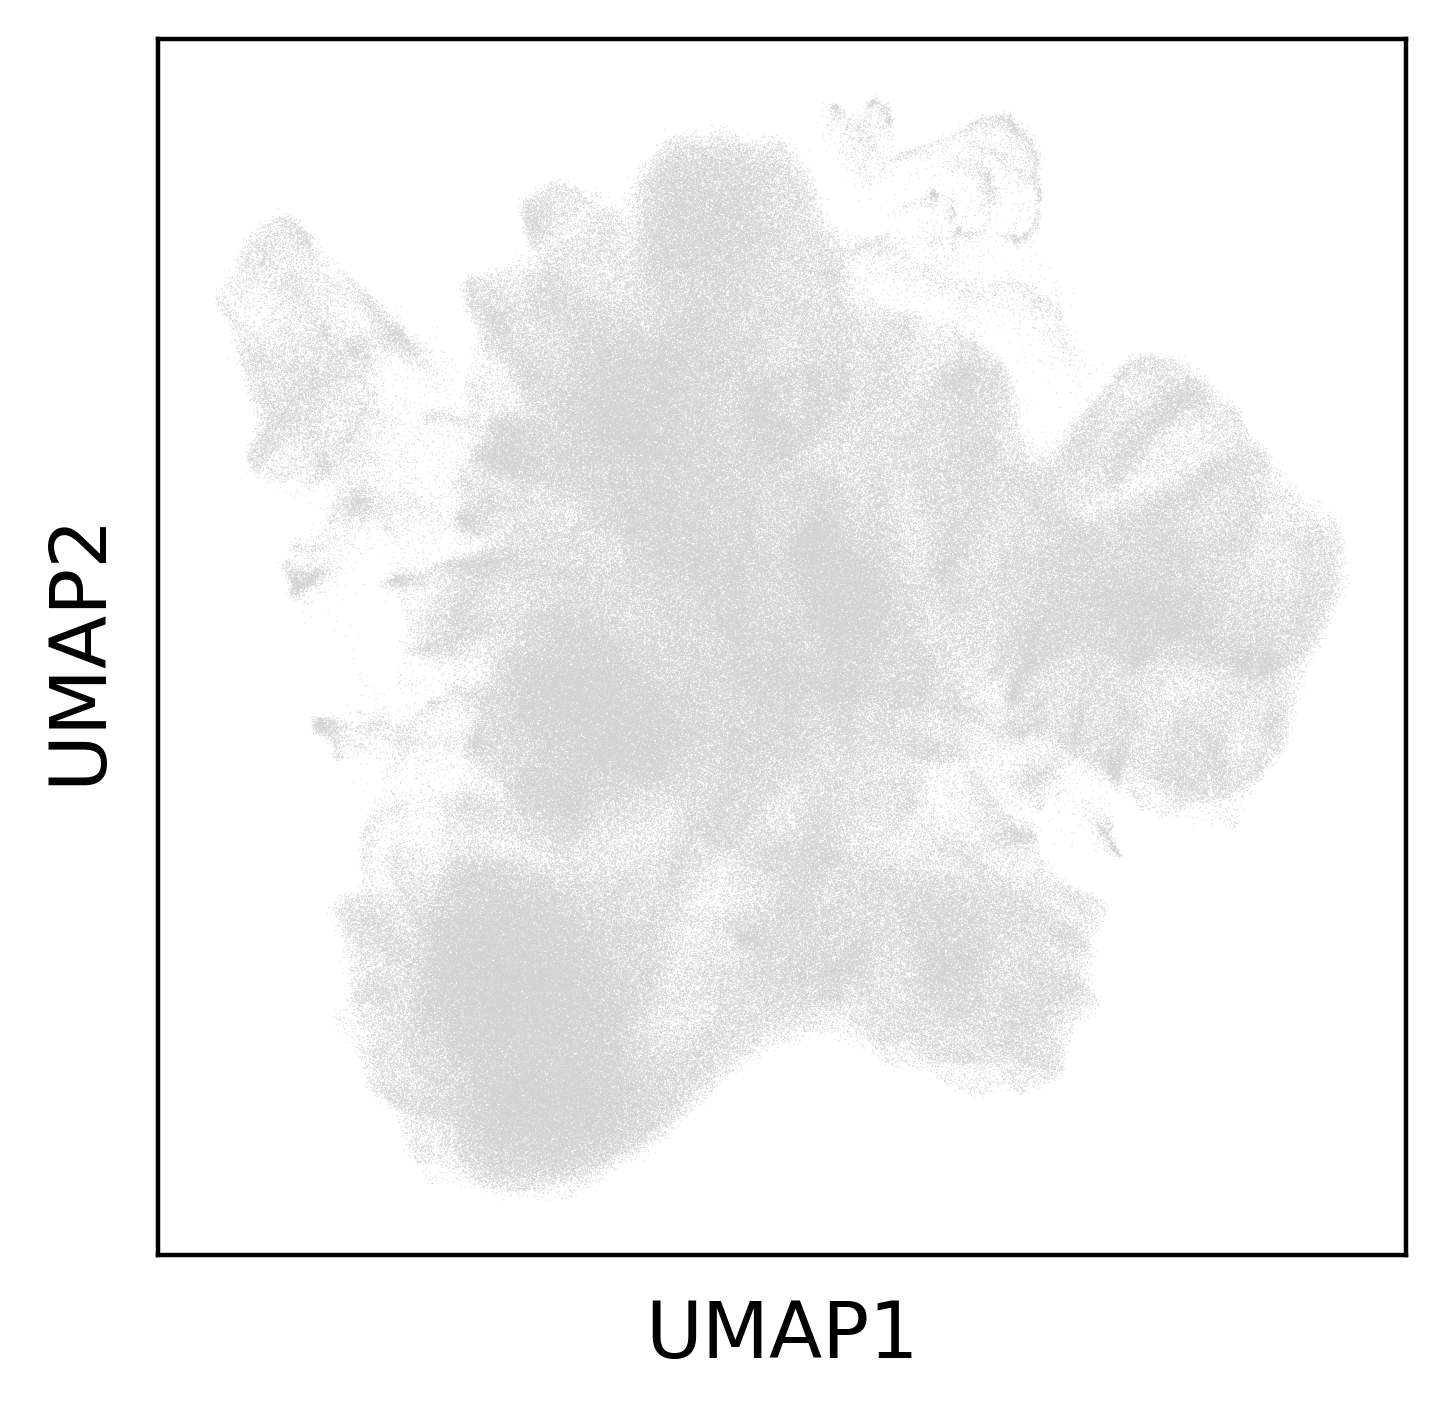

In [131]:
sc.pl.umap(full_latent)

In [4]:
full_latent=sc.read("../../important_processed_data/9.13_full_latent.h5ad")

In [6]:
ref_latent=full_latent[reference.obs_names,:]

In [7]:
ref_latent

View of AnnData object with n_obs × n_vars = 273479 × 15
    uns: 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [8]:
query_latent=full_latent[~full_latent.obs_names.isin(reference.obs_names),:]

In [9]:
query_latent

View of AnnData object with n_obs × n_vars = 509028 × 15
    uns: 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [103]:
import scanpy as sc
import pandas as pd
import os # TEMP FOR TESTING


from collections import Counter

import numpy as np
from sklearn.neighbors import KNeighborsTransformer
sc.settings.figdir="../result/9.10_extend_atlas/"

In [3]:

def weighted_knn_trainer(train_adata, train_adata_emb, label_key, n_neighbors=50):
    """Trains a weighted KNN classifier on ``train_adata``.
    Parameters
    ----------
    train_adata: :class:`~anndata.AnnData`
        Annotated dataset to be used to train KNN classifier with ``label_key`` as the target variable.
    train_adata_emb: str
        Name of the obsm layer to be used for calculation of neighbors. If set to "X", anndata.X will be
        used
    label_key: str
        Name of the column to be used as target variable (e.g. cell_type) in ``train_adata`` and ``query_adata``.
    n_neighbors: int
        Number of nearest neighbors in KNN classifier.
    """
    print(
        f"Weighted KNN with n_neighbors = {n_neighbors} ... ",
        end="",
    )
    k_neighbors_transformer = KNeighborsTransformer(
        n_neighbors=n_neighbors,
        mode="distance",
        algorithm="brute",
        metric="euclidean",
        n_jobs=-1,
    )
    if train_adata_emb == "X":
        train_emb = train_adata.X
    elif train_adata_emb in train_adata.obsm.keys():
        train_emb = train_adata.obsm[train_adata_emb]
    else:
        raise ValueError(
            "train_adata_emb should be set to either 'X' or the name of the obsm layer to be used!"
        )
    k_neighbors_transformer.fit(train_emb)
    return k_neighbors_transformer


def weighted_knn_transfer(
    query_adata,
    query_adata_emb,
    ref_adata_obs,
    label_keys,
    knn_model,
    threshold=1,
    pred_unknown=False,
    mode="package",
):
    """Annotates ``query_adata`` cells with an input trained weighted KNN classifier.
    Parameters
    ----------
    query_adata: :class:`~anndata.AnnData`
        Annotated dataset to be used to queryate KNN classifier. Embedding to be used
    query_adata_emb: str
        Name of the obsm layer to be used for label transfer. If set to "X",
        query_adata.X will be used
    ref_adata_obs: :class:`pd.DataFrame`
        obs of ref Anndata
    label_keys: str
        Names of the columns to be used as target variables (e.g. cell_type) in ``query_adata``.
    knn_model: :class:`~sklearn.neighbors._graph.KNeighborsTransformer`
        knn model trained on reference adata with weighted_knn_trainer function
    threshold: float
        Threshold of uncertainty used to annotating cells as "Unknown". cells with
        uncertainties higher than this value will be annotated as "Unknown".
        Set to 1 to keep all predictions. This enables one to later on play
        with thresholds.
    pred_unknown: bool
        ``False`` by default. Whether to annotate any cell as "unknown" or not.
        If `False`, ``threshold`` will not be used and each cell will be annotated
        with the label which is the most common in its ``n_neighbors`` nearest cells.
    mode: str
        Has to be one of "paper" or "package". If mode is set to "package",
        uncertainties will be 1 - P(pred_label), otherwise it will be 1 - P(true_label).
    """
    if not type(knn_model) == KNeighborsTransformer:
        raise ValueError(
            "knn_model should be of type sklearn.neighbors._graph.KNeighborsTransformer!"
        )

    if query_adata_emb == "X":
        query_emb = query_adata.X
    elif query_adata_emb in query_adata.obsm.keys():
        query_emb = query_adata.obsm[query_adata_emb]
    else:
        raise ValueError(
            "query_adata_emb should be set to either 'X' or the name of the obsm layer to be used!"
        )
    top_k_distances, top_k_indices = k_neighbors_transformer.kneighbors(X=query_emb)

    stds = np.std(top_k_distances, axis=1)
    stds = (2.0 / stds) ** 2
    stds = stds.reshape(-1, 1)

    top_k_distances_tilda = np.exp(-np.true_divide(top_k_distances, stds))

    weights = top_k_distances_tilda / np.sum(
        top_k_distances_tilda, axis=1, keepdims=True
    )
    cols = ref_adata_obs.columns[ref_adata_obs.columns.str.endswith(label_keys)]
    uncertainties = pd.DataFrame(columns=cols, index=query_adata.obs_names)
    pred_labels = pd.DataFrame(columns=cols, index=query_adata.obs_names)
    for i in range(len(weights)):
        for j in cols:
            y_train_labels = ref_adata_obs[j].values
            unique_labels = np.unique(y_train_labels[top_k_indices[i]])
            best_label, best_prob = None, 0.0
            for candidate_label in unique_labels:
                candidate_prob = weights[
                    i, y_train_labels[top_k_indices[i]] == candidate_label
                ].sum()
                if best_prob < candidate_prob:
                    best_prob = candidate_prob
                    best_label = candidate_label

            if pred_unknown:
                if best_prob >= threshold:
                    pred_label = best_label
                else:
                    pred_label = "Unknown"
            else:
                pred_label = best_label

            if mode == "package":
                uncertainties.iloc[i][j] = (max(1 - best_prob, 0))

            else:
                raise Exception("Inquery Mode!")

            pred_labels.iloc[i][j] = (pred_label)

    print("finished!")

    return pred_labels, uncertainties

In [199]:
k_neighbors_transformer

KNeighborsTransformer(algorithm='brute', metric='euclidean', n_jobs=-1,
                      n_neighbors=50)

In [32]:
k_neighbors_transformer = weighted_knn_trainer(
        train_adata=ref_latent,
        train_adata_emb="X",
        label_key="_named",
        n_neighbors=50,
    )

Weighted KNN with n_neighbors = 50 ... 

In [10]:
adata=sc.read(
    "../../important_processed_data/8.27_merge_var_78w.h5ad"
)

In [11]:
adata.obs.loc[query_latent.obs_names]

Sample             Project  \
AAACCCACACAACGTT-1_1_2_1          Articular_Arce_CtrlI      Articular_Arce   
AAACCCACATGAGATA-1_1_2_1          Articular_Arce_CtrlI      Articular_Arce   
AAACGAAAGAGTGTTA-1_1_2_1          Articular_Arce_CtrlI      Articular_Arce   
AAACGCTAGAGTTGAT-1_1_2_1          Articular_Arce_CtrlI      Articular_Arce   
AAACGCTCACGGGTAA-1_1_2_1          Articular_Arce_CtrlI      Articular_Arce   
...                                                ...                 ...   
TTTGTTGAGCGTTCCG_8        Septoclasts_Kishor_Fracture4  Septoclasts_Kishor   
TTTGTTGAGTGGAAAG_8        Septoclasts_Kishor_Fracture4  Septoclasts_Kishor   
TTTGTTGCAAATCCCA_8        Septoclasts_Kishor_Fracture4  Septoclasts_Kishor   
TTTGTTGCACGGTCTG_8        Septoclasts_Kishor_Fracture4  Septoclasts_Kishor   
TTTGTTGTCTTAAGGC_8        Septoclasts_Kishor_Fracture4  Septoclasts_Kishor   

                         Core Dataset Limb Atlas Cranial Atlas Organ  \
AAACCCACACAACGTT-1_1_2_1        FALSE         NA         FALSE  Limb   
AAACCCACATGAGATA-1_1_2_1        FALSE         NA         FALSE  Limb   
AAACGAAAGAGTGTTA-1_1_2_1        FALSE         NA         FALSE  Limb   
AAACGCTAGAGTTGAT-1_1_2_1        FALSE         NA         FALSE  Limb   
AAACGCTCACGGGTAA-1_1_2_1        FALSE         NA         FALSE  Limb   
...                               ...        ...           ...   ...   
TTTGTTGAGCGTTCCG_8              FALSE         NA         FALSE  Limb   
TTTGTTGAGTGGAAAG_8              FALSE         NA         FALSE  Limb   
TTTGTTGCAAATCCCA_8              FALSE         NA         FALSE  Limb   
TTTGTTGCACGGTCTG_8              FALSE         NA         FALSE  Limb   
TTTGTTGTCTTAAGGC_8              FALSE         NA         FALSE  Limb   

                                  Tissue     Tissue(Specific)  \
AAACCCACACAACGTT-1_1_2_1  Synovial Joint  Knee Synovial Joint   
AAACCCACATGAGATA-1_1_2_1  Synovial Joint  Knee Synovial Joint   
AAACGAAAGAGTGTTA-1_1_2_1  Synovial Joint  Knee Synovial Joint   
AAACGCTAGAGTTGAT-1_1_2_1  Synovial Joint  Knee Synovial Joint   
AAACGCTCACGGGTAA-1_1_2_1  Synovial Joint  Knee Synovial Joint   
...                                  ...                  ...   
TTTGTTGAGCGTTCCG_8             Long bone          Bone marrow   
TTTGTTGAGTGGAAAG_8             Long bone          Bone marrow   
TTTGTTGCAAATCCCA_8             Long bone          Bone marrow   
TTTGTTGCACGGTCTG_8             Long bone          Bone marrow   
TTTGTTGTCTTAAGGC_8             Long bone          Bone marrow   

                                         Stage Gene type  ... n_genes  \
AAACCCACACAACGTT-1_1_2_1  Injury(Regeneration)        WT  ...    2906   
AAACCCACATGAGATA-1_1_2_1  Injury(Regeneration)        WT  ...    5964   
AAACGAAAGAGTGTTA-1_1_2_1  Injury(Regeneration)        WT  ...    5178   
AAACGCTAGAGTTGAT-1_1_2_1  Injury(Regeneration)        WT  ...    5747   
AAACGCTCACGGGTAA-1_1_2_1  Injury(Regeneration)        WT  ...    4790   
...                                        ...       ...  ...     ...   
TTTGTTGAGCGTTCCG_8        Injury(Regeneration)        WT  ...    2648   
TTTGTTGAGTGGAAAG_8        Injury(Regeneration)        WT  ...    3769   
TTTGTTGCAAATCCCA_8        Injury(Regeneration)        WT  ...    3588   
TTTGTTGCACGGTCTG_8        Injury(Regeneration)        WT  ...    3871   
TTTGTTGTCTTAAGGC_8        Injury(Regeneration)        WT  ...    2410   

                         n_genes_by_counts log1p_n_genes_by_counts  \
AAACCCACACAACGTT-1_1_2_1              2906                7.974877   
AAACCCACATGAGATA-1_1_2_1              5964                8.693664   
AAACGAAAGAGTGTTA-1_1_2_1              5178                8.552367   
AAACGCTAGAGTTGAT-1_1_2_1              5747                8.656607   
AAACGCTCACGGGTAA-1_1_2_1              4790                8.474494   
...                                    ...                     ...   
TTTGTTGAGCGTTCCG_8                    2648                7.881937   
TTTGTTGAGTGGAAAG_8          

In [12]:
query_latent.obs=adata.obs.loc[query_latent.obs_names]

In [33]:
query_conditions = [
    ds
    for ds in query_latent.obs.Project.unique().tolist()
]

In [15]:
ref_latent.obs=reference.obs

In [19]:
ref_latent

AnnData object with n_obs × n_vars = 273479 × 15
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Cre', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'K2', 'K6', 'K12', 'K24', 'K53', 'K2.1', 'K6.1', 'K12.1', 'K24.1', 'K53.1', 'K2.2', 'K6.2', 'K12.2', 'K24.2', 'K53.2', 'K2.3', 'K6.3', 'K12.3', 'K24.3', 'K53.3', 'C2', 'C6', 'C12', 'C21', 'C41', 'K4', 'K11', 'K25', 'K57', 'C4', 'C9', 'C22', 'C42', 'K5', 'K19', 'K65', 'C17', 'C36', 'C5', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200

In [35]:
outpath="../result/9.13_knn"

In [17]:
columns_to_drop = ['C2_named', 'C6_named',"C12_named","C21_named","C41_named",'C9_named', 'C22_named',"C42_named","C4_named","C5_named","C17_named","C36_named"]

In [18]:
ref_latent.obs.drop(columns=columns_to_drop, inplace=True)

In [31]:
ref_latent.obs["C2_named"]

Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0    Non-osteo
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0    Non-osteo
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0           Ob
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0           Ob
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0    Non-osteo
                                                  ...    
TTTGACTGTATTTCCT-1_5-1-2                        Non-osteo
TTTGACTGTTGCATTG-1_5-1-2                        Non-osteo
TTTGACTTCTTGGGCG-1_5-1-2                        Non-osteo
TTTGGAGCAGCGACAA-1_5-1-2                               Ob
TTTGGTTCACTACTTT-1_5-1-2                               Ob
Name: C2_named, Length: 273479, dtype: object

In [28]:
ref_latent.obs["C2_named"]="Low quality"

In [29]:
ref_latent.obs["C2_named"][wt_meta.index]=wt_meta["C2_named"]

/tmp/ipykernel_1803550/3062295731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_latent.obs["C2_named"][wt_meta.index]=wt_meta["C2_named"]


In [30]:
ref_latent.obs["C7_named"]="Low quality"
ref_latent.obs["C7_named"][wt_meta.index]=wt_meta["C7_named"]
ref_latent.obs["C19_named"]="Low quality"
ref_latent.obs["C19_named"][wt_meta.index]=wt_meta["C19_named"]
ref_latent.obs["C36_named"]="Low quality"
ref_latent.obs["C36_named"][wt_meta.index]=wt_meta["C36_named"]
ref_latent.obs["C49_named"]="Low quality"
ref_latent.obs["C49_named"][wt_meta.index]=wt_meta["C49_named"]
ref_latent.obs["C90_named"]="Low quality"
ref_latent.obs["C90_named"][wt_meta.index]=wt_meta["C90_named"]
ref_latent.obs["C137_named"]="Low quality"
ref_latent.obs["C137_named"][wt_meta.index]=wt_meta["C137_named"]

/tmp/ipykernel_1803550/1639528007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_latent.obs["C7_named"][wt_meta.index]=wt_meta["C7_named"]
/tmp/ipykernel_1803550/1639528007.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_latent.obs["C19_named"][wt_meta.index]=wt_meta["C19_named"]
/tmp/ipykernel_1803550/1639528007.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_latent.obs["C36_named"][wt_meta.index]=wt_meta["C36

In [26]:
wt_meta=wt_meta.set_index("Unnamed: 0")

In [50]:
ref_latent.obs=reference.obs

In [57]:
wt_meta=wt_meta.set_index("Unnamed: 0")

In [60]:
wt_meta

orig.ident  \
Unnamed: 0                                                             
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0   Suture2021_Farmer_E17   
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0   Suture2021_Farmer_E17   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0   Suture2021_Farmer_E17   
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0   Suture2021_Farmer_E17   
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0   Suture2021_Farmer_E17   
...                                                              ...   
TTTGACTGTATTTCCT-1_5-1-2                      Metaphysis_Yang_sorted   
TTTGACTGTTGCATTG-1_5-1-2                      Metaphysis_Yang_sorted   
TTTGACTTCTTGGGCG-1_5-1-2                      Metaphysis_Yang_sorted   
TTTGGAGCAGCGACAA-1_5-1-2                      Metaphysis_Yang_sorted   
TTTGGTTCACTACTTT-1_5-1-2                      Metaphysis_Yang_sorted   

                                              nCount_originalexp  \
Unnamed: 0                                                         
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0             11668.0   
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0             14744.0   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0             14962.0   
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0             14473.0   
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0             14249.0   
...                                                          ...   
TTTGACTGTATTTCCT-1_5-1-2                                 11255.0   
TTTGACTGTTGCATTG-1_5-1-2                                  2748.0   
TTTGACTTCTTGGGCG-1_5-1-2                                 18312.0   
TTTGGAGCAGCGACAA-1_5-1-2                                 70471.0   
TTTGGTTCACTACTTT-1_5-1-2                                138528.0   

                                              nFeature_originalexp  \
Unnamed: 0                                                           
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0                  3222   
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0                  3910   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0                  3533   
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0                  3565   
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0                  3968   
...                                                            ...   
TTTGACTGTATTTCCT-1_5-1-2                                      3122   
TTTGACTGTTGCATTG-1_5-1-2                                      1298   
TTTGACTTCTTGGGCG-1_5-1-2                                      4340   
TTTGGAGCAGCGACAA-1_5-1-2                                      6264   
TTTGGTTCACTACTTT-1_5-1-2                                      8254   

                                                              Sample  \
Unnamed: 0                                                             
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0   Suture2021_Farmer_E17   
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0   Suture2021_Farmer_E17   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0   Suture2021_Farmer_E17   
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0   Suture2021_Farmer_E17   
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0   Suture2021_Farmer_E17   
...                                                              ...   
TTTGACTGTATTTCCT-1_5-1-2                      Metaphysis_Yang_sorted   
TTTGACTGTTGCATTG-1_5-1-2                      Metaphysis_Yang_sorted   
TTTGACTTCTTGGGCG-1_5-1-2                      Metaphysis_Yang_sorted   
TTTGGAGCAGCGACAA-1_5-1-2                      Metaphysis_Yang_sorted   
TTTGGTTCACTACTTT-1_5-1-2                      Metaphysis_Yang_sorted   

                                                        Project  Limb.Atlas  \
Unnamed: 0                                                                    
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0  Suture2021_Farmer       False   
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0  Suture2021_Farmer       False   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0  Suture2021_Farmer       Fa

In [36]:
for condition in query_conditions[::-1]: # (going from small to large dataset, to see quickly if code is working)
    print(condition)
    query_subadata = query_latent[query_latent.obs.Project == condition,:].copy()
    print(query_subadata.shape)
    # load model and set relevant variables:
    labels, uncert = weighted_knn_transfer(
        query_adata=query_subadata,
        query_adata_emb="X",
        label_keys="_named",
        knn_model=k_neighbors_transformer,
        ref_adata_obs = ref_latent.obs
    )
    labels.to_csv(outpath+'/'+condition+'_labels.csv')
    uncert.to_csv(outpath+'/'+condition+'_uncert.csv')

Septoclasts_Kishor
(30340, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f395b415ca0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3ba8096e50>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


SSC2021_Ambrosi
(348, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f395b415ca0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
Sp7Cre2019_Bohm
(178, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b05a5af70>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
SkeletalMuscle_Julien
(29035, 15)
finished!


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b068b8790>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


RibRegeneraton_Serowoky
(12011, 15)
finished!
Periosteal2018_Shawon


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b068b8790>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


(632, 15)
finished!
Periodontium_Nagata


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3ba8096e50>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


(1925, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b068b8790>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
MsxCranio_Zhang
(6883, 15)
finished!
MscMineCulture_Basel
(7178, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f395b415ca0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback functio

finished!
Mmp14_Chu
(4677, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3ba8096e50>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
LimbSSC_Chan
(171, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f395b415ca0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
LimbImplant_VesPrey
(7594, 15)
finished!
LimbHumanDevelop_He


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b05a5af70>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


(31656, 15)
finished!
LimbG610C_Gorrell
(51016, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3ba8096e50>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b05a5af70>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


LimbBgn_Shainer
(23047, 15)
finished!


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b05a5af70>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


HeterotopicActin_Mundy
(4326, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3ba8096e50>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
GrowthplateSox9_Abdul
(9036, 15)
finished!
Growthplate_Li


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3ba8096e50>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


(217, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3ba8096e50>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
Frontal_Holmes
(4317, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f395b415ca0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
Forelimb_He
(920, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b05a5af70>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
EnthesisGli_Fang
(8114, 15)
finished!
DigitRegeneration_Johnson


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3ba8096e50>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


(27269, 15)
finished!


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3ba8096e50>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


CranioSoxc_Angelozzi
(29500, 15)
finished!


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3ba8096e50>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


BMSC-Specification_Kishor
(5491, 15)
finished!
Bmsc2019_Regev
(18138, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f395c15d3a0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b05a5af70>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


LimbFgf23_Ayako
(4504, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f395c15d3a0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
DigitLmx1b_Miller
(5771, 15)
finished!
Digit2019_Storer
(22141, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f395c15d3a0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3ba8096e50>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


CranioRepairP75_Xu
(5946, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b05a5af70>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
CalvariaHuman_He
(6991, 15)
finished!
BmscSp7Cre_Youlten
(8494, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b05a5af70>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
BmscPth1r_Fu


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f395c15d3a0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


(20456, 15)
finished!


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f395c15d3a0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


BMSCNiche2019_Baccin
(1784, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b05a43d30>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
BmscMyelofibrosis_Leimkühler
(2681, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b05a433a0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
BmscMds_Hayashi
(22947, 15)
finished!


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f395c15d3a0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


BmscInjury_Zhong
(2496, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b05a433a0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
BmscHuman_Jardine
(2423, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b05a433a0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
BmscGVHD_Gu
(7148, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b05a433a0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
BmscGli_Shi
(1020, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f395c15d3a0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
BmscFac2019_Anastasia
(17374, 15)
finished!


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f395c15d3a0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


BmscEpi_Kanazawa
(1813, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3ba8096e50>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
BmscDll4_Xu
(13553, 15)
finished!


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b05a5af70>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


BmscDiffereation_Wolock
(2831, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3b05a43d30>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
BmscAging_Young
(21633, 15)
finished!


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f395c15d3a0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


BMSC-Stress_Mo
(11893, 15)
finished!


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f395c15d3a0>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Articular_Sebastian
(4645, 15)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3ba8096e50>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


finished!
Articular_Arce
(6465, 15)
finished!


In [189]:
k_neighbors_transformer

KNeighborsTransformer(algorithm='brute', metric='euclidean', n_jobs=-1,
                      n_neighbors=50)

In [191]:
outpath

'../result/9.13_knn'

In [ ]:
labels, uncert = weighted_knn_transfer(
        query_adata=ref_latent,
        query_adata_emb="X",
        label_keys="_named",
        knn_model=k_neighbors_transformer,
        ref_adata_obs = ref_latent.obs
    )
labels.to_csv(outpath+'/reflatent_labels.csv')
uncert.to_csv(outpath+'/reflatent_uncert.csv')

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f2d2c3bb790>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [40]:
import glob
dir_label_transfer_res=outpath
uncerts = glob.glob(f"{dir_label_transfer_res}/*uncert*")
uncerts

['../result/9.13_knn/SSC2021_Ambrosi_uncert.csv',
 '../result/9.13_knn/Sp7Cre2019_Bohm_uncert.csv',
 '../result/9.13_knn/MsxCranio_Zhang_uncert.csv',
 '../result/9.13_knn/Periodontium_Nagata_uncert.csv',
 '../result/9.13_knn/DigitRegeneration_Johnson_uncert.csv',
 '../result/9.13_knn/Frontal_Holmes_uncert.csv',
 '../result/9.13_knn/Septoclasts_Kishor_uncert.csv',
 '../result/9.13_knn/Mmp14_Chu_uncert.csv',
 '../result/9.13_knn/BMSC-Specification_Kishor_uncert.csv',
 '../result/9.13_knn/Articular_Sebastian_uncert.csv',
 '../result/9.13_knn/BmscMds_Hayashi_uncert.csv',
 '../result/9.13_knn/BmscFac2019_Anastasia_uncert.csv',
 '../result/9.13_knn/EnthesisGli_Fang_uncert.csv',
 '../result/9.13_knn/LimbHumanDevelop_He_uncert.csv',
 '../result/9.13_knn/DigitLmx1b_Miller_uncert.csv',
 '../result/9.13_knn/Bmsc2019_Regev_uncert.csv',
 '../result/9.13_knn/Forelimb_He_uncert.csv',
 '../result/9.13_knn/LimbBgn_Shainer_uncert.csv',
 '../result/9.13_knn/LimbImplant_VesPrey_uncert.csv',
 '../result/9.

In [41]:
uncerts = glob.glob(f"{dir_label_transfer_res}/*uncert*")
# labs = glob.glob(f"{dir_label_transfer_res}/*label*")
results = {}
for i in uncerts:
    dataset_name = "_".join(i.split("/")[-1].split("_")[:-1])
    ds_uncerts = pd.read_csv(
        f"{dir_label_transfer_res}/{dataset_name}_uncert.csv", index_col=0
    )
    ds_labels = pd.read_csv(
        f"{dir_label_transfer_res}/{dataset_name}_labels.csv", index_col=0
    )
    # remove "_embed" suffices from indices:
    ds_uncerts.index = [x.split("_embed")[0] for x in ds_uncerts.index]
    ds_labels.index = [x.split("_embed")[0] for x in ds_labels.index]
    # store in results dictionary
    results[dataset_name] = (
        ds_uncerts,
        ds_labels,
    )

In [58]:
results["SSC2021_Ambrosi"][0].iloc[:, :0:-1]

C137_named  C90_named  \
SSCb_M1_pvSSC_p03_2m_AAACCCAGTTCC.CAAGAAGAAGAA_...    0.680005   0.680005   
SSCb_M1_pvSSC_p03_2m_AAACGGGACCTC.TTGGAGGAACAA_...    0.719981   0.719981   
SSCb_M2_ocSSC_p04_P10_2m_AAACTTGCCGAT.TCTTCTTCT...    0.559996   0.499993   
SSCb_M2_ocSSC_p04_N20_2m_AAAGCACTGCGT.TTCACAAGG...    0.659999   0.659999   
SSCb_M1_pvSSC_p03_2m_AACGACGCAAGG.TTCTGAACGAAA_...    0.420012   0.420012   
...                                                        ...        ...   
SSCb_M2_ocSSC_p04_P14_2m_TTTGGCATCTGT.TTCCCGTTG...    0.480005   0.180008   
SSCb_M2_ocSSC_p02_J05_2m_TTTGTCTTTGCG.CGGGTCGGT...    0.639991   0.639991   
SSCb_M1_pvSSC_p03_2m_TTTGTGTTCCCT.AACGCTGTGAGC_...    0.639996   0.639996   
SSCb_M1_pvSSC_p03_2m_TTTGTTACTCCT.ACTGGGTCCAAA_...    0.540002   0.540002   
SSCb_M2_ocSSC_p04_H06_2m_TTTGTTTCCGTA.TTAGAACGG...    0.460005   0.359996   

                                                    C49_named  C36_named  \
SSCb_M1_pvSSC_p03_2m_AAACCCAGTTCC.CAAGAAGAAGAA_...   0.319997   0.180012   
SSCb_M1_pvSSC_p03_2m_AAACGGGACCTC.TTGGAGGAACAA_...   0.679983   0.619940   
SSCb_M2_ocSSC_p04_P10_2m_AAACTTGCCGAT.TCTTCTTCT...   0.499993   0.499993   
SSCb_M2_ocSSC_p04_N20_2m_AAAGCACTGCGT.TTCACAAGG...   0.559992   0.440008   
SSCb_M1_pvSSC_p03_2m_AACGACGCAAGG.TTCTGAACGAAA_...   0.420012   0.159979   
...                                                       ...        ...   
SSCb_M2_ocSSC_p04_P14_2m_TTTGGCATCTGT.TTCCCGTTG...   0.019998   0.019998   
SSCb_M2_ocSSC_p02_J05_2m_TTTGTCTTTGCG.CGGGTCGGT...   0.540000   0.179991   
SSCb_M1_pvSSC_p03_2m_TTTGTGTTCCCT.AACGCTGTGAGC_...   0.360003   0.340002   
SSCb_M1_pvSSC_p03_2m_TTTGTTACTCCT.ACTGGGTCCAAA_...   0.420000   0.420000   
SSCb_M2_ocSSC_p04_H06_2m_TTTGTTTCCGTA.TTAGAACGG...   0.359996   0.359996   

                                                    C19_named  C7_named  
SSCb_M1_pvSSC_p03_2m_AAACCCAGTTCC.CAAGAAGAAGAA_...   0.180012  0.180012  
SSCb_M1_pvSSC_p03_2m_AAACGGGACCTC.TTGGAGGAACAA_...   0.619940  0.580016  
SSCb_M2_ocSSC_p04_P10_2m_AAACTTGCCGAT.TCTTCTTCT...   0.119999  0.119999  
SSCb_M2_ocSSC_p04_N20_2m_AAAGCACTGCGT.TTCACAAGG...   0.440008  0.000000  
SSCb_M1_pvSSC_p03_2m_AACGACGCAAGG.TTCTGAACGAAA_...   0.159979  0.159979  
...                                                       ...       ...  
SSCb_M2_ocSSC_p04_P14_2m_TTTGGCATCTGT.TTCCCGTTG...   0.019998  0.000000  
SSCb_M2_ocSSC_p02_J05_2m_TTTGTCTTTGCG.CGGGTCGGT...   0.179991  0.000000  
SSCb_M1_pvSSC_p03_2m_TTTGTGTTCCCT.AACGCTGTGAGC_...   0.340002  0.340002  
SSCb_M1_pvSSC_p03_2m_TTTGTTACTCCT.ACTGGGTCCAAA_...   0.420000  0.420000  
SSCb_M2_ocSSC_p04_H06_2m_TTTGTTTCCGTA.TTAGAACGG...   0.119983  0.119983  

[348 rows x 6 columns]

In [80]:
results_df = pd.DataFrame()
for i in results.keys():
    res_tmp = pd.DataFrame()
    most_confident_level = results[i][0].iloc[:, :0:-1].idxmin(axis=1)
    res_tmp["most_confident_level"] = most_confident_level
    res_tmp["most_confident_uncert"] = pd.Series(
        results[i][0].lookup(results[i][0].index, most_confident_level),
        index=results[i][0].index,
    )
    res_tmp["most_confident_label"] = pd.Series(
        results[i][1].lookup(results[i][0].index, most_confident_level),
        index=results[i][0].index,
    )
    res_tmp["transf_ann_level_7_uncert"] = results[i][0]["C137_named"]
    res_tmp["transf_ann_level_7_label"] = results[i][1]["C137_named"]
    res_tmp["transf_ann_level_6_uncert"] = results[i][0]["C90_named"]
    res_tmp["transf_ann_level_6_label"] = results[i][1]["C90_named"]
    res_tmp["transf_ann_level_5_uncert"] = results[i][0]["C49_named"]
    res_tmp["transf_ann_level_5_label"] = results[i][1]["C49_named"]
    res_tmp["transf_ann_level_4_uncert"] = results[i][0]["C36_named"]
    res_tmp["transf_ann_level_4_label"] = results[i][1]["C36_named"]
    res_tmp["transf_ann_level_3_uncert"] = results[i][0]["C19_named"]
    res_tmp["transf_ann_level_3_label"] = results[i][1]["C19_named"]
    res_tmp["transf_ann_level_2_uncert"] = results[i][0]["C7_named"]
    res_tmp["transf_ann_level_2_label"] = results[i][1]["C7_named"]
    res_tmp["transf_ann_level_1_uncert"] = results[i][0]["C2_named"]
    res_tmp["transf_ann_level_1_label"] = results[i][1]["C2_named"]
    results_df = pd.concat([results_df, res_tmp], axis=0)

/tmp/ipykernel_1803550/2996610110.py:7: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  results[i][0].lookup(results[i][0].index, most_confident_level),
/tmp/ipykernel_1803550/2996610110.py:11: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  results[i][1].lookup(results[i][0].index, most_confident_level),
/tmp/ipykernel_1803550/2996610110.py:7: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  results[i][0].lookup(results[i][0].index, most_confident_level),
/tmp/ipykernel_1803550/2996610110.py:11: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  results[i][1].lookup(result

In [81]:
results_df

most_confident_level  \
SSCb_M1_pvSSC_p03_2m_AAACCCAGTTCC.CAAGAAGAAGAA_...            C36_named   
SSCb_M1_pvSSC_p03_2m_AAACGGGACCTC.TTGGAGGAACAA_...             C7_named   
SSCb_M2_ocSSC_p04_P10_2m_AAACTTGCCGAT.TCTTCTTCT...            C19_named   
SSCb_M2_ocSSC_p04_N20_2m_AAAGCACTGCGT.TTCACAAGG...             C7_named   
SSCb_M1_pvSSC_p03_2m_AACGACGCAAGG.TTCTGAACGAAA_...            C36_named   
...                                                                 ...   
CB23_TTTGATCGTATATGGA-1_20_1                                   C7_named   
CB23_TTTGATCGTCCGGCAT-1_20_1                                  C19_named   
CB23_TTTGGAGAGCATCCTA-1_20_1                                  C19_named   
CB23_TTTGTTGCATCGCCTT-1_20_1                                  C19_named   
CB23_TTTGTTGGTGCTCTTC-1_20_1                                  C19_named   

                                                    most_confident_uncert  \
SSCb_M1_pvSSC_p03_2m_AAACCCAGTTCC.CAAGAAGAAGAA_...               0.180012   
SSCb_M1_pvSSC_p03_2m_AAACGGGACCTC.TTGGAGGAACAA_...               0.580016   
SSCb_M2_ocSSC_p04_P10_2m_AAACTTGCCGAT.TCTTCTTCT...               0.119999   
SSCb_M2_ocSSC_p04_N20_2m_AAAGCACTGCGT.TTCACAAGG...               0.000000   
SSCb_M1_pvSSC_p03_2m_AACGACGCAAGG.TTCTGAACGAAA_...               0.159979   
...                                                                   ...   
CB23_TTTGATCGTATATGGA-1_20_1                                     0.399964   
CB23_TTTGATCGTCCGGCAT-1_20_1                                     0.139999   
CB23_TTTGGAGAGCATCCTA-1_20_1                                     0.040001   
CB23_TTTGTTGCATCGCCTT-1_20_1                                     0.039998   
CB23_TTTGTTGGTGCTCTTC-1_20_1                                     0.039996   

                                                   most_confident_label  \
SSCb_M1_pvSSC_p03_2m_AAACCCAGTTCC.CAAGAAGAAGAA_...     Col6a6.Ly6a+ MSC   
SSCb_M1_pvSSC_p03_2m_AAACGGGACCTC.TTGGAGGAACAA_...                  MSC   
SSCb_M2_ocSSC_p04_P10_2m_AAACTTGCCGAT.TCTTCTTCT...                  CPC   
SSCb_M2_ocSSC_p04_N20_2m_AAAGCACTGCGT.TTCACAAGG...              Chondro   
SSCb_M1_pvSSC_p03_2m_AACGACGCAAGG.TTCTGAACGAAA_...     Col6a6.Ly6a+ MSC   
...                                                                 ...   
CB23_TTTGATCGTATATGGA-1_20_1                                        MSC   
CB23_TTTGATCGTCCGGCAT-1_20_1                                 Lepr+ BMSC   
CB23_TTTGGAGAGCATCCTA-1_20_1                                 Lepr+ BMSC   
CB23_TTTGTTGCATCGCCTT-1_20_1                                 Lepr+ BMSC   
CB23_TTTGTTGGTGCTCTTC-1_20_1                                 Lepr+ BMSC   

                                                    transf_ann_level_7_uncert  \
SSCb_M1_pvSSC_p03_2m_AAACCCAGTTCC.CAAGAAGAAGAA_...                   0.680005   
SSCb_M1_pvSSC_p03_2m_AAACGGGACCTC.TTGGAGGAACAA_...                   0.719981   
SSCb_M2_ocSSC_p04_P10_2m_AAACTTGCCGAT.TCTTCTTCT...                   0.559996   
SSCb_M2_ocSSC_p04_N20_2m_AAAGCACTGCGT.TTCACAAGG...                   0.659999   
SSCb_M1_pvSSC_p03_2m_AACGACGCAAGG.TTCTGAACGAAA_...                   0.420012   
...                                                                       ...   
CB23_TTTGATCGTATATGGA-1_20_1                                         0.720006   
CB23_TTTGATCGTCCGGCAT-1_20_1                                         0.520005   
CB23_TTTGGAGAGCATCCTA-1_20_1                                         0.760003   
CB23_TTTGTTGCATCGCCTT-1_20_1                                         0.700011   
CB23_TTTGTTGGTGCTCTTC-1_20_1                                         0.660002   

                                                            transf_ann_level_7_label  \
SSCb_M1_pvSSC_p03_2m_AAACCCAGTTCC.CAAGAAGAAGAA_...      Pi16.Clec3b.Col6a6.Ly6a+ MSC   
SSCb_M1_pvSSC_p03_2m_AAACGGGACCTC.TTGGAGGAACAA_...             Agtr2.Gas2.Middle.MSC   
SSCb_M2_ocSSC_p04_P10_2m_AAACTTGCCGAT.TCTTCTTCT...                Cilp2.Omd.Prg4.CPC   

In [82]:
results["Mmp14_Chu"][0]

C2_named      C7_named  C19_named  C36_named  \
AAACGCTCACTATGTG-1_1_18_2  1.110223e-16  1.110223e-16   0.339991   0.339991   
AAAGGATCAGTCGGTC-1_1_18_2  1.997216e-02  1.398992e-01   0.159896   0.319866   
AAAGGATGTTCAAGTC-1_1_18_2  0.000000e+00  0.000000e+00   0.279995   0.279995   
AACAAAGAGGTTTACC-1_1_18_2  1.110223e-16  5.199835e-01   0.519983   0.519983   
AACAACCAGGTCATCT-1_1_18_2  0.000000e+00  3.600049e-01   0.360005   0.360005   
...                                 ...           ...        ...        ...   
TTTGGTTTCCCGGTAG-1_2_18_2  0.000000e+00  0.000000e+00   0.040001   0.280001   
TTTGGTTTCTGAATGC-1_2_18_2  1.110223e-16  1.110223e-16   0.019999   0.059999   
TTTGTTGCACATGGTT-1_2_18_2  1.110223e-16  1.110223e-16   0.079994   0.119997   
TTTGTTGCACTGCTTC-1_2_18_2  0.000000e+00  0.000000e+00   0.040004   0.040004   
TTTGTTGGTGGATCAG-1_2_18_2  3.599695e-01  3.599695e-01   0.399972   0.399972   

                           C49_named  C90_named  C137_named  
AAACGCTCACTATGTG-1_1_18_2   0.359989   0.359989    0.359989  
AAAGGATCAGTCGGTC-1_1_18_2   0.319866   0.319866    0.399969  
AAAGGATGTTCAAGTC-1_1_18_2   0.379988   0.379988    0.379988  
AACAAAGAGGTTTACC-1_1_18_2   0.519995   0.679982    0.739980  
AACAACCAGGTCATCT-1_1_18_2   0.360005   0.680005    0.680005  
...                              ...        ...         ...  
TTTGGTTTCCCGGTAG-1_2_18_2   0.280001   0.559994    0.559994  
TTTGGTTTCTGAATGC-1_2_18_2   0.059999   0.300000    0.399998  
TTTGTTGCACATGGTT-1_2_18_2   0.259989   0.259989    0.259989  
TTTGTTGCACTGCTTC-1_2_18_2   0.259996   0.259996    0.259996  
TTTGTTGGTGGATCAG-1_2_18_2   0.499985   0.619982    0.619982  

[4677 rows x 7 columns]

In [183]:
results_df.to_csv("../../important_processed_data/9.13_transfered_labels_query_only.csv")

In [182]:
results_df

most_confident_level  most_confident_uncert  \
AAACCCACACAACGTT-1_1_2_1            C49_named               0.000000   
AAACCCACATGAGATA-1_1_2_1             C7_named               0.040022   
AAACGAAAGAGTGTTA-1_1_2_1             C7_named               0.380071   
AAACGCTAGAGTTGAT-1_1_2_1            C19_named               0.139990   
AAACGCTCACGGGTAA-1_1_2_1            C19_named               0.399994   
...                                       ...                    ...   
TTTGTTGAGCGTTCCG_8                   C7_named               0.100001   
TTTGTTGAGTGGAAAG_8                   C7_named               0.020000   
TTTGTTGCAAATCCCA_8                   C7_named               0.000000   
TTTGTTGCACGGTCTG_8                   C7_named               0.119984   
TTTGTTGTCTTAAGGC_8                  C19_named               0.000000   

                         most_confident_label  transf_ann_level_7_uncert  \
AAACCCACACAACGTT-1_1_2_1       Ccl11.Pericyte                   0.200031   
AAACCCACATGAGATA-1_1_2_1                  MSC                   0.779952   
AAACGAAAGAGTGTTA-1_1_2_1                  MSC                   0.819939   
AAACGCTAGAGTTGAT-1_1_2_1                Fibro                   0.439948   
AAACGCTCACGGGTAA-1_1_2_1                Fibro                   0.660001   
...                                       ...                        ...   
TTTGTTGAGCGTTCCG_8                    Chondro                   0.540003   
TTTGTTGAGTGGAAAG_8                    Chondro                   0.880000   
TTTGTTGCAAATCCCA_8                    Chondro                   0.680041   
TTTGTTGCACGGTCTG_8                    Chondro                   0.779986   
TTTGTTGTCTTAAGGC_8                         Ob                   0.540005   

                               transf_ann_level_7_label  \
AAACCCACACAACGTT-1_1_2_1    Myh11.Higd1b.Ccl11.Pericyte   
AAACCCACATGAGATA-1_1_2_1          Agtr2.Pclaf.Early.MSC   
AAACGAAAGAGTGTTA-1_1_2_1          Thbs4.Ptx4.Aspn.Fibro   
AAACGCTAGAGTTGAT-1_1_2_1    Mmp3.Spon2.Anxa8.Aspn.Fibro   
AAACGCTCACGGGTAA-1_1_2_1          Thbs4.Ptx4.Aspn.Fibro   
...                                                 ...   
TTTGTTGAGCGTTCCG_8                     C1qtnf3.Ucma.CPC   
TTTGTTGAGTGGAAAG_8             Ihh.Il17b.Mature Chondro   
TTTGTTGCAAATCCCA_8             Ihh.Il17b.Mature Chondro   
TTTGTTGCACGGTCTG_8        R3hdml.Pcp4.Crispld1.Ucma.CPC   
TTTGTTGTCTTAAGGC_8                       Car3.Bglap3.Ob   

                          transf_ann_level_6_uncert  transf_ann_level_6_label  \
AAACCCACACAACGTT-1_1_2_1                   0.100001     Higd1b.Ccl11.Pericyte   
AAACCCACATGAGATA-1_1_2_1                   0.779952     Agtr2.Pclaf.Early.MSC   
AAACGAAAGAGTGTTA-1_1_2_1                   0.800027       Tac1.Alcam.Late.MSC   
AAACGCTAGAGTTGAT-1_1_2_1                   0.439948    Spon2.Anxa8.Aspn.Fibro   
AAACGCTCACGGGTAA-1_1_2_1                   0.660001           Ptx4.Aspn.Fibro   
...                                             ...                       ...   
TTTGTTGAGCGTTCCG_8                         0.540003          C1qtnf3.Ucma.CPC   
TTTGTTGAGTGGAAAG_8                         0.840001    Pcp4.Crispld1.Ucma.CPC   
TTTGTTGCAAATCCCA_8                         0.680041  Ihh.Il17b.Mature Chondro   
TTTGTTGCACGGTCTG_8                         0.759983    Pcp4.Crispld1.Ucma.CPC   
TTTGTTGTCTTAAGGC_8                         0.079995                 Bglap3.Ob   

                          transf_ann_level_5_uncert transf_ann_level_5_label  \
AAACCCACACAACGTT-1_1_2_1                   0.000000           Ccl11.Pericyte   
AAACCCACATGAGATA-1_1_2_1                   0.399995          Pclaf.Early.MSC   
AAACGAAAGAGTGTTA-1_1_2_1                   0.800027      Tac1.Alcam.Late.MSC   
AAACGCTAGAGTTGAT-1_1_2_1                   0.319975         Anxa8.Aspn.Fibro   
AAACGCTCACGGGTAA-1_1_2_1                   0.660001          Ptx4.Aspn.Fibro   
...                                             ...                      ...   
TTTGT

In [85]:
results_df=results_df.loc[query_latent.obs.index]

In [121]:
query_latent.obs["transf_ann_level_6_label"]=results_df['transf_ann_level_6_label']
query_latent.obs["transf_ann_level_7_label"]=results_df['transf_ann_level_7_label']

In [87]:
ref_latent

AnnData object with n_obs × n_vars = 273479 × 15
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Cre', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'K2', 'K6', 'K12', 'K24', 'K53', 'K2.1', 'K6.1', 'K12.1', 'K24.1', 'K53.1', 'K2.2', 'K6.2', 'K12.2', 'K24.2', 'K53.2', 'K2.3', 'K6.3', 'K12.3', 'K24.3', 'K53.3', 'C2', 'C6', 'C12', 'C21', 'C41', 'K4', 'K11', 'K25', 'K57', 'C4', 'C9', 'C22', 'C42', 'K5', 'K19', 'K65', 'C17', 'C36', 'C5', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200

In [89]:
ref_latent.obs["transf_ann_level_7_label"]=ref_latent.obs["C137_named"]
ref_latent.obs["transf_ann_level_6_label"]=ref_latent.obs["C90_named"]
ref_latent.obs["transf_ann_level_5_label"]=ref_latent.obs["C49_named"]
ref_latent.obs["transf_ann_level_4_label"]=ref_latent.obs["C36_named"]
ref_latent.obs["transf_ann_level_3_label"]=ref_latent.obs["C19_named"]
ref_latent.obs["transf_ann_level_2_label"]=ref_latent.obs["C7_named"]
ref_latent.obs["transf_ann_level_1_label"]=ref_latent.obs["C2_named"]

In [122]:
full_latent2=sc.concat([ref_latent,query_latent],join="outer")

In [123]:
full_latent.obs=full_latent2.obs

In [179]:
full_latent.obs["Core_or_Extand"]="Extand"

In [180]:
full_latent.obs["Core_or_Extand"][ref_latent.obs_names]="Core"

/tmp/ipykernel_1803550/3436284681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_latent.obs["Core_or_Extand"][ref_latent.obs_names]="Core"


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


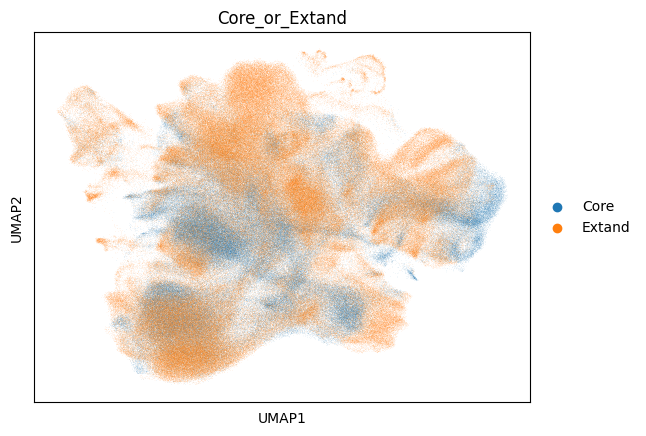

In [102]:
sc.pl.umap(full_latent,color="Core_or_Extand")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


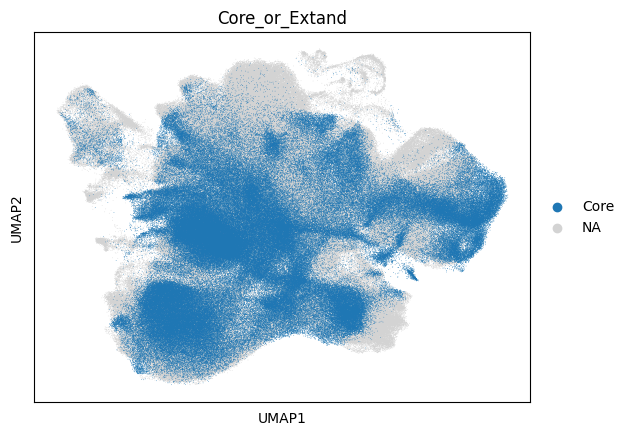

In [105]:
sc.pl.umap(full_latent,color="Core_or_Extand",size=1,groups="Core",save="coreData.pdf")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


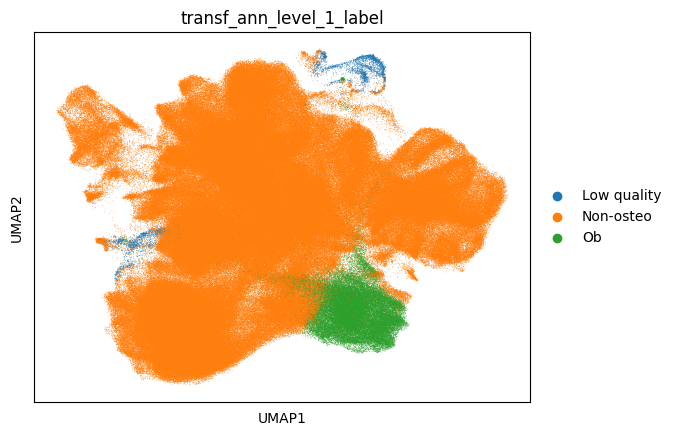

In [107]:
sc.pl.umap(full_latent,color="transf_ann_level_1_label",size=1,save="transf_level1.pdf")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


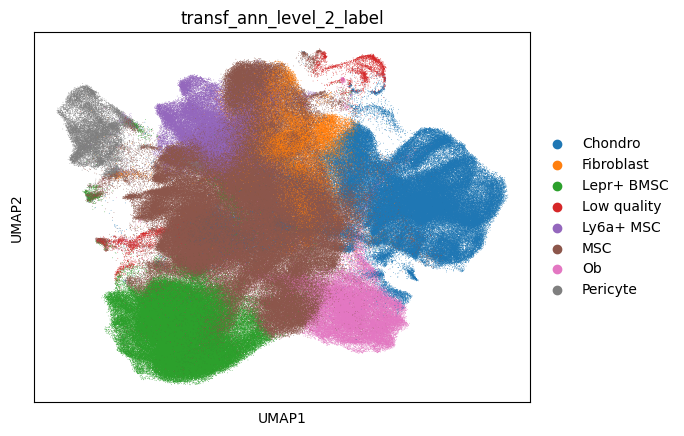

In [108]:
sc.pl.umap(full_latent,color="transf_ann_level_2_label",size=1,save="transf_level2.pdf")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


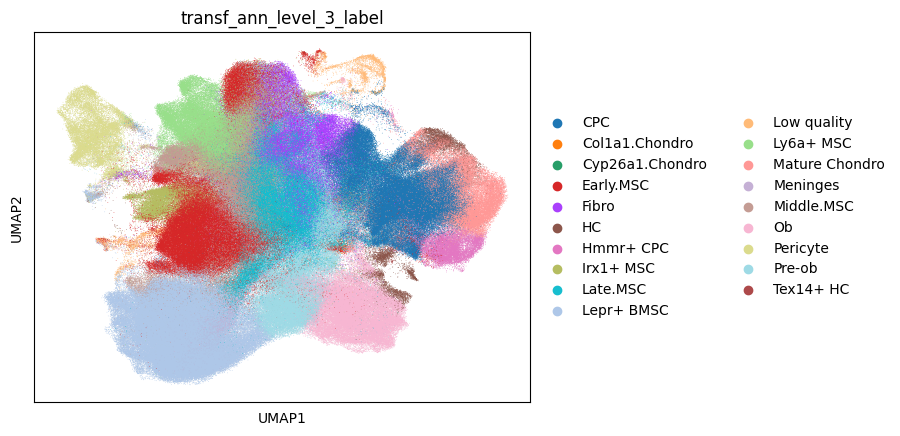

In [109]:
sc.pl.umap(full_latent,color="transf_ann_level_3_label",size=1,save="transf_level3.pdf")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


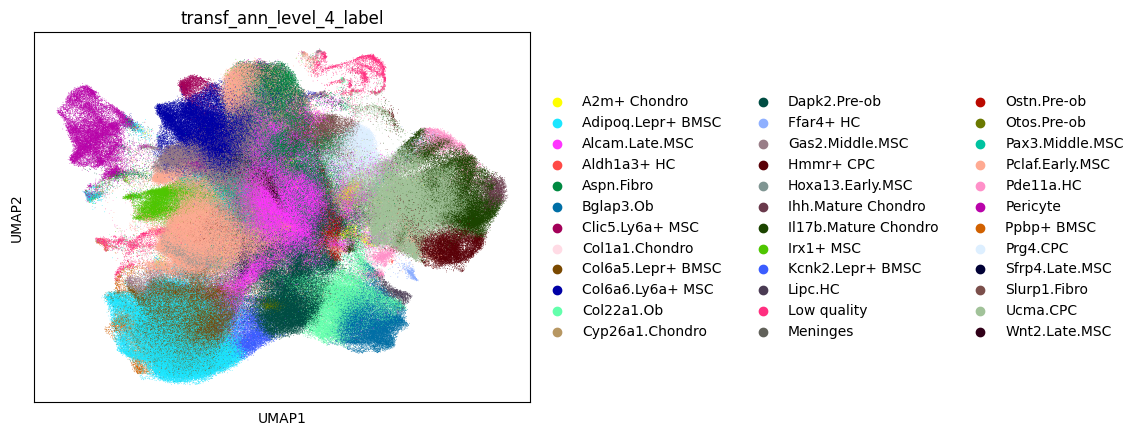

In [110]:
sc.pl.umap(full_latent,color="transf_ann_level_4_label",size=1,save="transf_level4.pdf")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


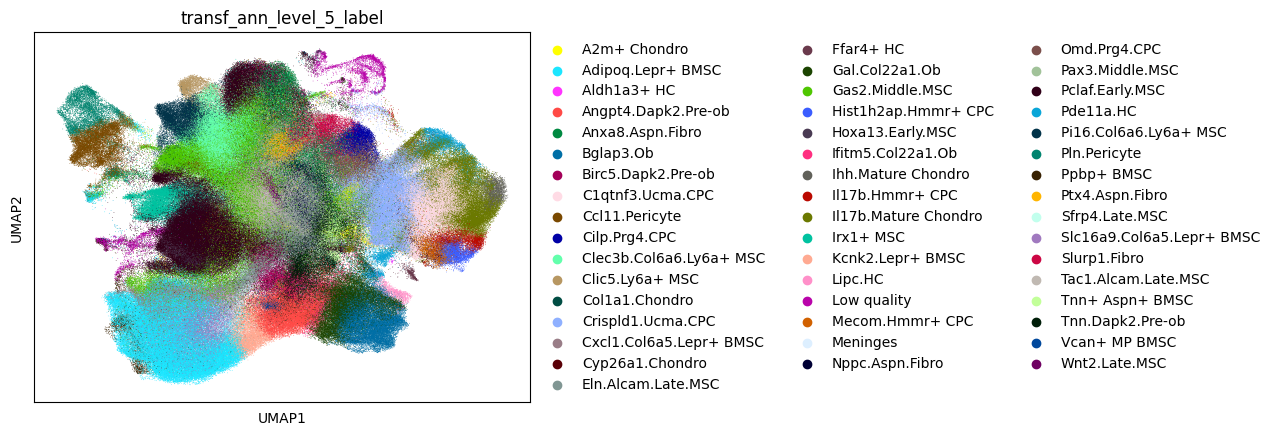

In [111]:
sc.pl.umap(full_latent,color="transf_ann_level_5_label",size=1,save="transf_level5.pdf")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


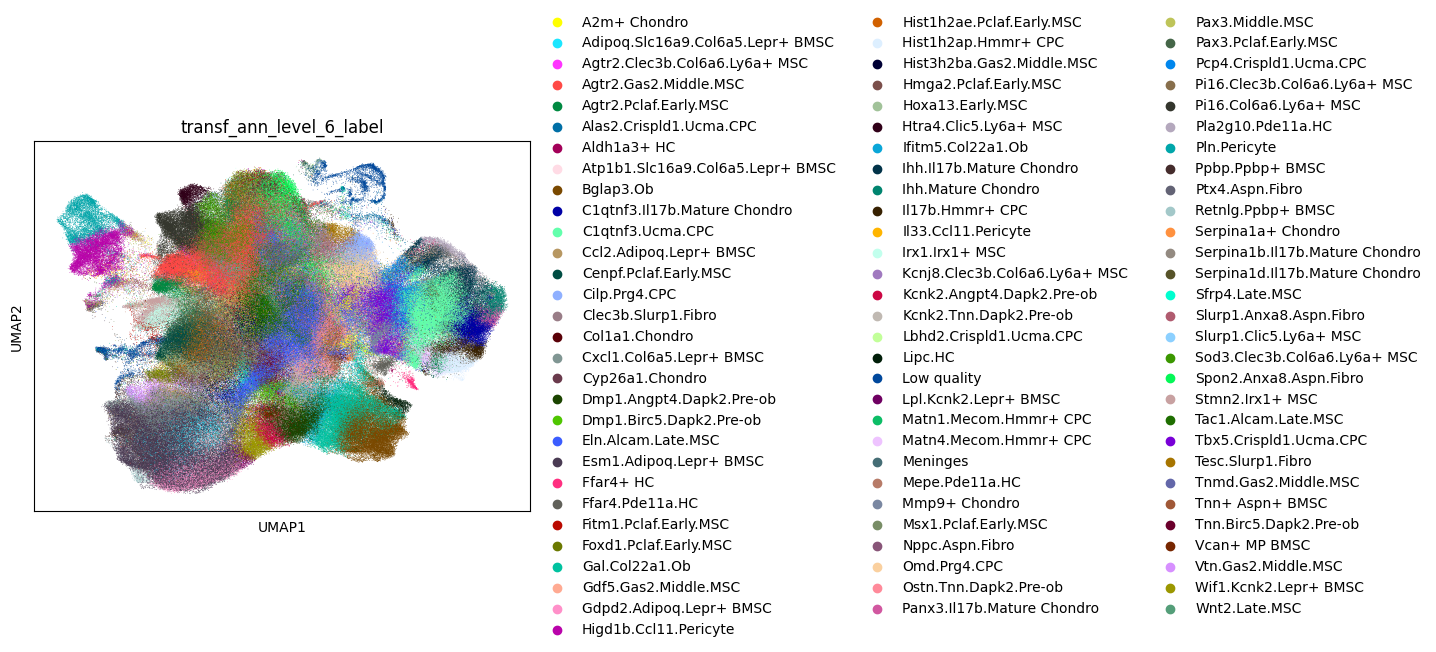

In [124]:
sc.pl.umap(full_latent,color="transf_ann_level_6_label",size=1,save="transf_level6.pdf")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


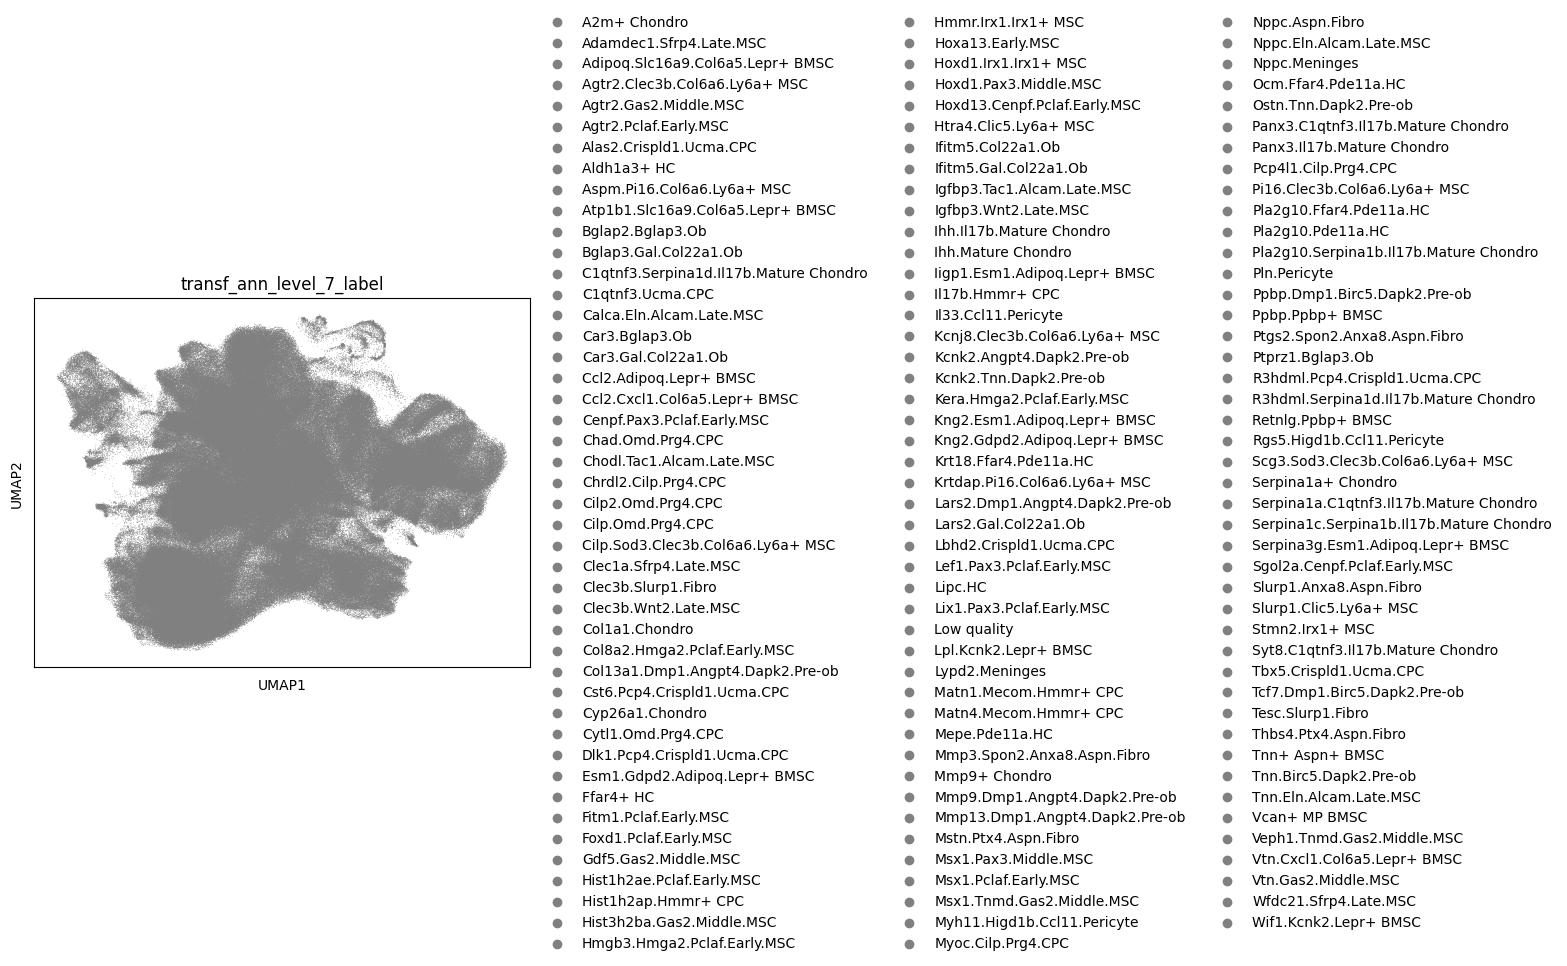

In [125]:
sc.pl.umap(full_latent,color="transf_ann_level_7_label",size=1,save="transf_level7.pdf")

In [198]:
full_latent

AnnData object with n_obs × n_vars = 782507 × 15
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Cre', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'C2_named', 'C7_named', 'C19_named', 'C36_named', 'C49_named', 'C90_named', 'C137_named', 'transf_ann_level_7_label', 'transf_ann_level_6_label', 'transf_ann_level_5_label', 'transf_ann_level_4_label', 'transf_ann_level_3_label', 'transf_ann_level_2_label', 'transf_ann_level_1_label', 'n_genes', 'most_confident_level', 'most_confident_uncert', 'most_confident_label', 'transf_ann_level_5_uncert', 'transf_ann_level_4_uncert', 'transf_ann_level_3_uncert', 'transf_ann_level_2_uncert', 'transf_ann_level_1_uncert', 'Tissue.Specific', 'Core_or_Ext

In [ ]:
sc.pl.umap(full_latent,color="transf_ann_level_7_label",size=1,save="transf_level7.pdf")

In [ ]:
sc.pl.umap(full_latent,color="Core_or_Extand",size=1,groups="Core",save="coreData.pdf")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


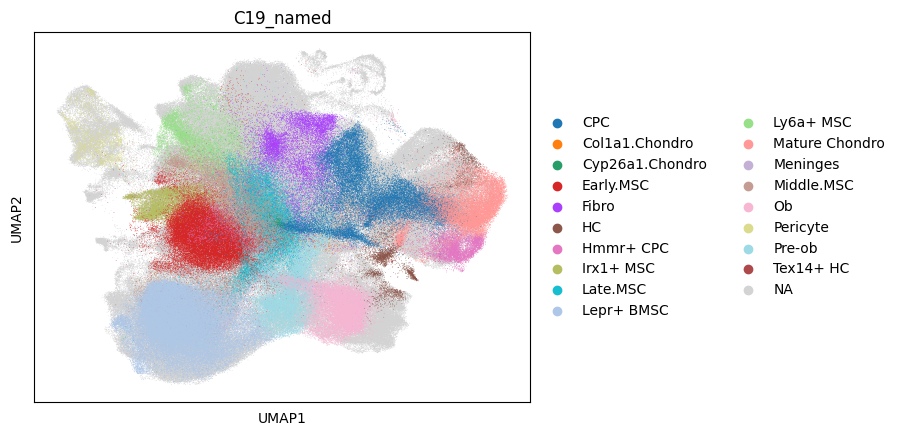

In [117]:
sc.pl.umap(full_latent,color="C19_named",size=1,
           groups=['Late.MSC', 'Ly6a+ MSC', 'Ob', 'Lepr+ BMSC', 'Pre-ob', 'Meninges',
       'Early.MSC', 'Middle.MSC', 'Fibro', 'HC', 'Pericyte', 'Irx1+ MSC',
       'CPC', 'Mature Chondro', 'Hmmr+ CPC', 'Col1a1.Chondro',
       'Tex14+ HC', 'Cyp26a1.Chondro'],save="C19_anno.pdf")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


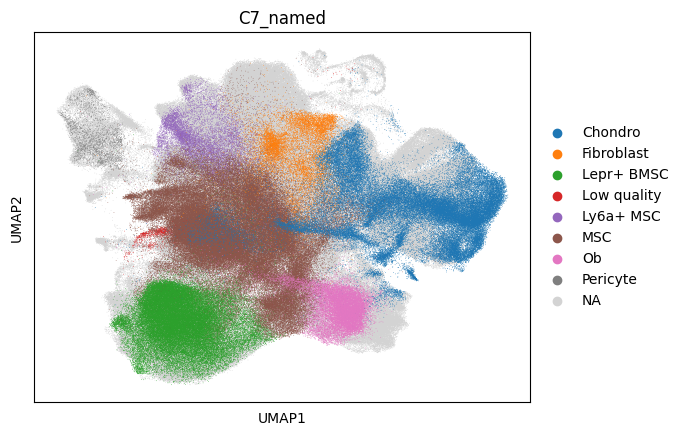

In [130]:
sc.pl.umap(full_latent,color="C7_named",size=1,groups=['MSC', 'Ly6a+ MSC', 'Ob', 'Lepr+ BMSC', 'Fibroblast', 'Chondro',
       'Pericyte',"Low quality"],save="C7_anno.pdf")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


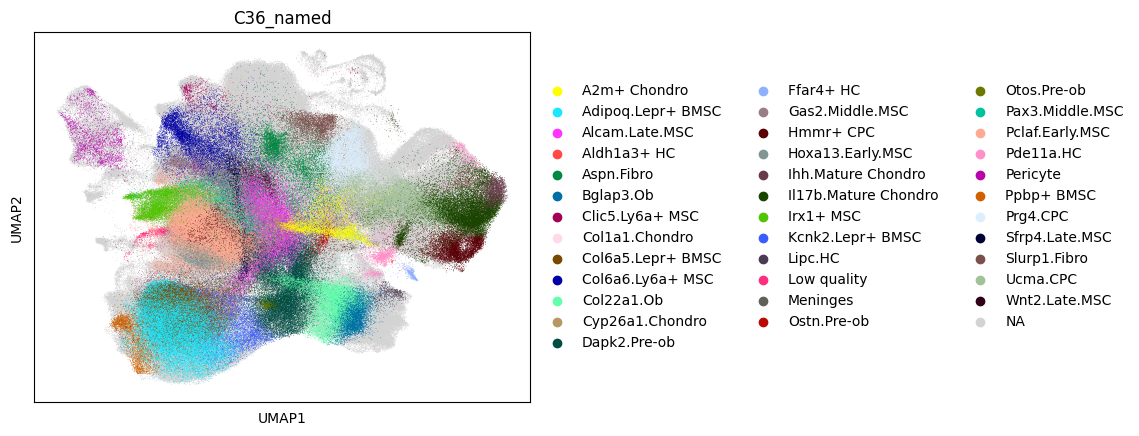

In [131]:
sc.pl.umap(full_latent,color="C36_named",size=1,
           groups=['Alcam.Late.MSC', 'Col6a6.Ly6a+ MSC', 'Col22a1.Ob',
       'Col6a5.Lepr+ BMSC', 'Dapk2.Pre-ob', 'Wnt2.Late.MSC', 'Meninges',
       'Pclaf.Early.MSC', 'Gas2.Middle.MSC', 'Pax3.Middle.MSC',
       'Aspn.Fibro', 'Bglap3.Ob', 'Lipc.HC', 'Adipoq.Lepr+ BMSC',
       'Ppbp+ BMSC', 'Pericyte', 'Ostn.Pre-ob', 'Irx1+ MSC',
       'A2m+ Chondro', 'Ucma.CPC', 'Otos.Pre-ob', 'Il17b.Mature Chondro',
       'Sfrp4.Late.MSC', 'Hmmr+ CPC', 'Pde11a.HC', 'Prg4.CPC',
       'Clic5.Ly6a+ MSC', 'Kcnk2.Lepr+ BMSC', 'Col1a1.Chondro',
       'Hoxa13.Early.MSC', 'Slurp1.Fibro', 'Ihh.Mature Chondro',
       'Aldh1a3+ HC', 'Ffar4+ HC', 'Cyp26a1.Chondro',"Low quality"],save="C36_anno.pdf")

In [133]:
metadata=pd.read_excel("../data/8.18_sampleMeta.xlsx")

In [134]:
metadata=pd.merge(full_latent.obs["Sample"],metadata,on="Sample")

In [140]:
full_latent

AnnData object with n_obs × n_vars = 782507 × 15
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Cre', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'K2', 'K6', 'K12', 'K24', 'K53', 'K2.1', 'K6.1', 'K12.1', 'K24.1', 'K53.1', 'K2.2', 'K6.2', 'K12.2', 'K24.2', 'K53.2', 'K2.3', 'K6.3', 'K12.3', 'K24.3', 'K53.3', 'C2', 'C6', 'C12', 'C21', 'C41', 'K4', 'K11', 'K25', 'K57', 'C4', 'C9', 'C22', 'C42', 'K5', 'K19', 'K65', 'C17', 'C36', 'C5', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200

In [143]:
metadata.columns

Index(['Sample', 'Project', 'Core Dataset', 'Limb Atlas', 'Cranial Atlas',
       'batch', 'Organ', 'Tissue', 'Tissue(Specific)', 'Stage', 'Gene type',
       'Treatment', 'Age', 'Age(In Detail)', 'Machine', 'Species',
       'Isolation approach', 'Digestion', 'Enzymes', 'Cre',
       'Bone Forming Methods', 'Data Source', 'Related Assay',
       'Cell Count After QC', 'Origin'],
      dtype='object')

In [149]:
metadata=metadata.fillna("Unkown")

In [156]:
full_latent.obs["Limb.Atlas"]

Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0    False
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0    False
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0    False
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0    False
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0    False
                                                ...  
TTTGTTGAGCGTTCCG_8                              False
TTTGTTGAGTGGAAAG_8                              False
TTTGTTGCAAATCCCA_8                              False
TTTGTTGCACGGTCTG_8                              False
TTTGTTGTCTTAAGGC_8                              False
Name: Limb.Atlas, Length: 782507, dtype: bool

In [158]:
full_latent.obs["Limb.Atlas"]=metadata["Limb Atlas"].values
full_latent.obs["Limb Atlas"]=metadata["Limb Atlas"].values

In [161]:
select_column=['orig.ident',  'Sample', 'Project', 'Limb.Atlas', 'Organ', 
               'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment',
               'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 
               'Digestion', 'Enzymes', 'Cre', 'Bone.Forming.Methods', 'Data.Source', 
               'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA',
               'paper_label', 'coarse_label','C2_named', 'C7_named', 'C19_named', 'C36_named', 'C49_named', 'C90_named', 'C137_named', 'transf_ann_level_7_label',
               'transf_ann_level_6_label', 'transf_ann_level_5_label', 'transf_ann_level_4_label', 
               'transf_ann_level_3_label', 'transf_ann_level_2_label', 'transf_ann_level_1_label', 
               'n_genes', 'most_confident_level', 'most_confident_uncert', 
               'most_confident_label', 'transf_ann_level_5_uncert', 'transf_ann_level_4_uncert', 'transf_ann_level_3_uncert', 
               'transf_ann_level_2_uncert', 'transf_ann_level_1_uncert']

In [163]:
full_latent=full_latent.obs[select_column]

In [159]:
full_latent.write_h5ad("../../important_processed_data/9.13_full_latent.h5ad")

In [164]:
full_latent=sc.read("../../important_processed_data/9.13_full_latent.h5ad")

In [174]:
full_latent.obs=full_latent.obs[select_column]

In [175]:
full_latent.obs["Tissue.Specific"]=metadata['Tissue(Specific)'].values

In [176]:
full_latent.obs["Bone.Forming.Methods"]=metadata['Bone Forming Methods'].values

In [177]:
full_latent.obs["Data.Source"]=metadata['Data Source'].values
full_latent.obs["Isolation.approach"]=metadata['Isolation approach'].values

full_latent.obs["Related.Assay"]=metadata['Related Assay'].values


NameError: name 'full_latent' is not defined

In [181]:
full_latent.write_h5ad("../../important_processed_data/9.13_full_latent.h5ad")